#4 - Ecommerce Customers Eda & Clustering


#.----------------------------------------------------------------

In [ ]:
import os
os.system('rm -f benLib1.py')
os.system('wget https://alpow.fr/benLib1.py')
os.system('pip install webptools')
os.system('pip install pysftp')
import benLib1
#pour les variables de scopes plus bas
from benLib1 import *
#import importlib;importlib.reload(benLib1);#reload

benLib1.sftp = {
    'cd': 'olist',
    'web': 'http://1.x24.fr/a/jupyter/olist/',
    'h': 'homez',
    'u': 'e',
    'p': 'r'}
benLib1.demo = 0
benLib1.verbose = 0
exclusions = 'heatmap,nbOrderedItemsPerClient,SumPayed,nbOrdersPerClient,sumOrderedItemsPerClient,productId2Review,nbItemsCommandes,Out,In,a,qty,qtyPurchasedItemsPerClientAndOrder,qtyPurchasedItemsPerClient,dataFrames,nbItemsPerOrder,nbItemsPerClientAndOrder,row,csvs,k,considerEmpty,file,index,idx,fn,f2'.split(
    ',')

def load(fn='allVars'):
  fns=fn.split(',')
  for fn in fns:
    globals().update(benLib1.resume(fn))

def save(exc=[],fn='allVars',include=False,backup=False,ftp=True,cleanup=False,zip=True,authTypes=[str,dict,list,int,np.ndarray,pd.DataFrame,pd.Series]):
  if(type(exc)==str):#quicksave single var
    excs=exc.split(',')
    for exc in excs:
      fn=exc
      include=[exc]
      exc=[]
      benLib1.save(globals(),exclusions=exc,fn=fn,include=include,backup=backup,ftp=ftp,cleanup=cleanup,zip=zip,authTypes=False)
    print(excs)
    return 1
  elif exc==[]:
    exc=exclusions;
  benLib1.save(globals(),exclusions=exc,fn=fn,include=include,backup=backup,ftp=ftp,cleanup=cleanup,zip=zip,authTypes=authTypes)
"""functions"""
import json
import numpy as np
import warnings
import itertools
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import glob
from sklearn import decomposition
from sklearn import preprocessing
"""variables"""
rfm = 'Recency Frequency Monetary'.split(' ')
noRfm = 'avgCartPrice avgItemPrice avgItemFdp nbProductsDifferents sumOrderedItems joursEntreCommandes'.split(
    ' ')
intColumns = 'Recency Frequency nbProductsDifferents sumOrderedItems joursEntreCommandes RFM_score9 RFM_score4 R F M RFM RFMq4 RFMq9 _RFMq4 _RFMq9'.split(
    ' ')
numericColumns = uniqueList(noRfm + intColumns + ['Monetary'])
kmp={};km={};pcac={};projections={};centers={};p_centers={};kPModel={};kModel={}

plt.style.use('fivethirtyeight')
# or evaluate js document frame innerWidth .
pd.set_option('display.width', 1200)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 40)
plt.rcParams["figure.figsize"] = (24, 12)
plt.rcParams['figure.facecolor'] = 'white'
np.random.seed(seed=1983)
rgb = ["red", "green", "blue"]
# lst2 présents au sein de lst1

def unikStrValues(x):
  return ','.join(sorted(pd.Series.unique(x)))

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3


intersect = intersection


def labelsToNumeric(x):
    labelencoder = LabelEncoder()
    return labelencoder.fit_transform(x),labelencoder    

def md5(x):
    res = hashlib.md5(str(x).encode())
    return res.hexdigest()



def firstValueOf(x):
    v = x.value_counts()
    return v.index[0]


def distinct(x):
    v = x.value_counts()
    # print(v.index[0])
    return ','.join(v.index)


###
%matplotlib inline


warnings.filterwarnings('ignore')


def unik(x):
    if(type(x) == list):
        from collections import Counter
        return dict(Counter(x))
    if type(x) == np.ndarray:
        return set(x)
# if dataframe
    return x.value_counts()


def vc(x):
    v = x.value_counts()  # print(v.sum())
    return v.sum()


def loadData(f, sep=','):
    return pd.read_csv(f, sep=',')


def unikPerCol(df, i):
    return df[df[i] != 0].groupby(i)[i].count().sort_values(ascending=False)


def unikValuesPerDataframe(df, exlude='z_'):
    u = {}
    # colonnesStrings=train.select_dtypes(include=['object']).columns
    colonnesStrings = df.columns.values
    for i in colonnesStrings:
        if i.startswith(exlude):
            continue
        suffix = ''
        if df.dtypes[i] == object:
            # cast All Strings to lowercase AND TRIM ?
            df[i] = df[i].str.lower()
        else:
            suffix = ' (mean:' + str(df[i].mean()) + ')'

        u[i] = len(df[i].unique())
        x = df[df[i] != 0].groupby(i)[i].count().sort_values(ascending=False)
        allUnique = ''
        if(x.values[0] == 1):
            allUnique = ' : all unique'

        print('_' * 120)
        print(' 🗲 Different values in ' + i +
              ' : ' + str(u[i]) + suffix + allUnique)
        if(x.values[0] > 1):
            print(x.head(5))


def unikValues(x):
    return x.value_counts()


def unikGt1(x):
    _s = x.value_counts()
    gt1 = _s[_s.gt(1)]
    return len(gt1)

    # radar stuff
#radar(_df[:1]['columns'.split(',')], 'titre',1)


def radar(_df, title='radar', seuilSuppression=0):
    fn = title + '.png'
    sel = _df.copy()
    # print(sel);print(sel['product_name'].values[0]);print(sel['code'].values[0])
    # print(sel.keys())
    for i in sel.keys():
        # print(i,type(sel[i].values[0]))#<class 'numpy.int64'>
        # print(i);print(sel[i].values[0])
        if type(sel[i].values[0]) == 'object':
            del(sel[i].values[0])
        elif(sel[i].values[0] < seuilSuppression):
            print('del', i)
            del(sel[i])
            # print('del:'+i)
# Exception: Data must be 1-dimensional
    # radardf = sel;#pd.DataFrame(dict(  r=sel.values[0], theta=sel.columns))
    radardf = pd.DataFrame(dict(columns=sel.columns, values=sel.values[0]))
    # print(radardf)
# color="strength", symbol="strength", size="frequency",color_discrete_sequence=px.colors.sequential.Plasma_r
    # scatter_polar
    fig = px.scatter_polar(radardf, r='values', theta='columns', title=title)
    #fig = px.line_polar(radardf,r='values',theta='columns', line_close=True,title=title)
    fig.update_traces(fill='toself')
    # f.savefig(fn,bbox_inches='tight');webp(fn);
    fig.show()

#radar(pd.DataFrame({'yo':40,'ya':20,'yi':70,'yu':90,'ye':25}, index=[0]),'titre',0)
# radar(x,'titre',0)


def kde(var, fn, quantilex=1, ax=False):
    save = 0
    if not ax:
        save = 1
        f, ax = plt.subplots(1, 1)
        f.patch.set_facecolor('white')
    ax.set_title(fn)
    # Avec les limites adaptées à chaque type de données
    ax.set_xlim(0, var.quantile(quantilex))
    var.plot(kind='kde', ax=ax).yscale = 'log'
    if save == 1:
        f.savefig(fn, bbox_inches='tight')
        webp(fn)
        plt.close()


def MagicPca(df, clusters, fn, log=False):
    _x = df.copy()
    cols = list(_x.columns.values)
    print(cols)
    if log:
        for i in cols:
            _x[i] = _x[i].apply(np.log).round(3)
        # passage au log ..
        _x.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    _std_scale = preprocessing.StandardScaler().fit(_x)
    _x_scaled = _std_scale.transform(_x)  # matrice autres paramètres
    # réduire à deux dimensions, dont les vecteurs ci dessous représentent les
    # contributions
    pca = decomposition.PCA(n_components=2, random_state=42)
    pca.fit(_x_scaled)
    pcs = pca.components_

    X_projected = pca.transform(_x_scaled)
    return pcaScatter(X_projected, pcs, clusters, cols, fn)


def pcaScatter(
        X_projected,
        clusters,
        cols,
        fn,
        alpha=1,
        pcs=False,
        centers=False,
        scaleEigenVectors=False,
        title=False,
        displayTriples=False,
        displayPairs=True,
        xmin=0,
        xmax=0,
        ymin=0,
        ymax=0):
  # print(type(centers),type(centers)==np.ndarray)
  xminFixed=0
  if(xmin!=0):
    xminFixed=1
  nbDimensions=X_projected.shape[1]
  #nbColonnes,vecteurs
  pairs=list(itertools.combinations(range(0,nbDimensions),2))
  #et les triples ?
  
  dims = {}
  k = 0

  if((nbDimensions>2) & displayTriples):
    triples=list(itertools.combinations(range(0,nbDimensions),3))
    for triple in triples:
      print(triple)
      xs=pca_projected[:,triple[0]];ys=pca_projected[:,triple[1]];zs=pca_projected[:,triple[2]]
      px.scatter_3d(pd.DataFrame.from_dict({'Dim'+str(triple[0]):xs,'Dim'+str(triple[1]):ys,'Dim'+str(triple[2]):zs,'color':clusters}),
                    x='Dim'+str(triple[0]),y='Dim'+str(triple[1]),z='Dim'+str(triple[2]),
                    color='color',color_continuous_scale=rgb,opacity=.3).show()

  if(displayPairs):
    for pair in pairs:
      print('dimensions',pair)
      xs = X_projected[:, pair[0]]
      ys = X_projected[:, pair[1]]
      if(xminFixed==0):
        xmax = xs.max()
        xmin = xs.min()
        ymax = ys.max()
        ymin = ys.min()

      xscale = (xmax - xmin) / 2
      yscale = (ymax - ymin) / 2
      mlim = min([abs(ymin), abs(ymax), abs(xmin), abs(xmax)])

      sns.scatterplot(xs, ys, alpha=alpha, hue=clusters, palette=sns.color_palette(
        'brg', np.unique(clusters).shape[0]))  
      
      if type(pcs) == np.ndarray:    
        nbColumns = pcs.shape[1]                      
        for i in list(range(nbColumns)):
            x1 = pcs[pair[0], i] * mlim  # xscale*0.5; exagérées
            y1 = pcs[pair[1], i] * mlim  # yscale*0.5;#deux dimensions

            if scaleEigenVectors:
                x1 = pcs[pair[0], i] * xscale * 0.5  # ; exagérées
                y1 = pcs[pair[1], i] * xscale * 0.5

            plt.arrow(
                0,
                0,
                x1 * 0.8,
                y1 * 0.8,
                width=0.04,
                color='k',
                alpha=0.8)
            plt.text(
                x1 * 0.9,
                y1 * 0.9,
                cols[i],
                color='k',
                ha='center',
                va='center',
                fontsize=32)
            if(xminFixed==0):
              if(x1 > xmax):
                  xmax = x1
              elif(x1 < xmin):
                  xmin = x1
              if(y1 > ymax):
                  ymax = y1
              elif(y1 < ymin):
                  ymin = y1
                  
      plt.xlabel('dim:'+str(pair[0]))
      plt.ylabel('dim:'+str(pair[1]))
      plt.xlim(xmin, xmax)
      plt.ylim(ymin, ymax)

      if(type(centers) == np.ndarray):
        plt.scatter(centers[:, pair[0]], centers[:, pair[1]],marker='x', color='k', linewidths=2, s=160)

      if title:
        plt.title('dim'+str(pair[0])+'-'+str(pair[1])+'-'+title)

      fn2='nbdim-'+str(nbDimensions)+'-dim'+str(pair[0])+'-'+str(pair[1])+'-'+fn
      plt.savefig(fn2, bbox_inches='tight')
      webp(fn2)
      plt.close()

  if type(pcs) == np.ndarray:
      for i in pcs:
          l = 0
          dims[k] = {}
          for j in i:
              dims[k][cols[l]] = j
              l += 1
          k += 1

  return dims


def lspca(dflog, champs, nbComponents=2):
    dflogscaled,_ = toLogScaled(dflog, champs)  # .remove('nbDays')
    nbSamples = dflogscaled.shape[0]
    # réduire à deux dimensions, dont les vecteurs ci dessous représentent les
    # contributions
    pca2 = decomposition.PCA(n_components=nbComponents, random_state=42)
    pca2.fit(dflogscaled)
    pcs = pca2.components_
    pca_projected = pca2.transform(dflogscaled)
    return pca2, pcs, pca_projected

# timeseries[selectedTimeInterval]=groupByInterval(dflog,groupBy)


def groupByInterval(df, groupBy, pcaProjection=False):
    dflog = df.copy()
    x = []
    if pcaProjection:
        # operands could not be broadcast together with shapes (94517,4) (3,)
        dflog = pcaProjection.transform(dflog.drop(
            [groupBy], axis=1))  # dflogscaled formed
        # print(dflog,dflog.shape)#94517 rows <== réincorporer nbDays
        dflog = pd.DataFrame(dflog)
        dflog[groupBy] = df[groupBy]  # renommer les colonnées
    grouppedBy = dflog.groupby(groupBy)
    for ix, rows in reversed(tuple(grouppedBy)):
        # print(ix,rows,rows.values.tolist())
        for row in rows.values.tolist():  # [champs]
            ng = []
            for cell in row:
                ng += [[cell]]
            x += [ng]
    return x

# groupByInterval(dflogscaled,groupBy,pca)


def stabilite(X_train, km, fn=''):
    subset = 96000
    plt.figure()
    for yi in range(nbClusters):
        plt.subplot(nbClusters, nbClusters, yi + 1)
        for xx in X_train[:subset][km.labels_[
                :subset] == yi]:  # is predicted cluster
            # for xx in X_train[y_pred == yi]:#is predicted cluster
            plt.plot(xx.ravel(), "k-", alpha=.2)
        # Mesure l'écart des centroides
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")
        # =nbcolumns: stabilité temporelle par cluster par nb colonne
        plt.xlim(0, nbcols)
        plt.ylim(-4, 4)
        plt.text(0.55, 0.85, 'Cluster %d' %
                 (yi + 1), transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Euclidean $k$-means")

    fn += 'tsKmeansStabilitat-' + \
        selectedTimeInterval + '-' + str(subset) + '.png'
    plt.savefig(fn, bbox_inches='tight')
    webp(fn)
    plt.close()
# projeter les centroides égalements
# pcaScatter(pca_projected,pcs,km[k]['global'][4],champs,fn='pca-'+k+'-logScaled-nbc:4.png',alpha=.3,centers=centers[k][4])

def radar2(df,fn='radar'):
  if type(df)==pd.core.series.Series:
    df=pd.DataFrame(df).T

  indexes=list(df.index.values);
  categories=list(df.columns.values)#[1:]
  N = len(categories)
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * 3.14 for n in range(N)]
  #angles += angles[:1]
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)  
  ax.set_title(fn)
  # We are going to plot the first line of the data frame.
  # But we need to repeat the first value to close the circular graph:
#TypeError: cannot do label indexing on <class 'pandas.core.indexes.category.CategoricalIndex'> with these indexers [0] of <class 'int'>  
  values=df.loc[indexes[0]].values.flatten().tolist()
  #values += values[:1]
  #print(len(categories),len(angles),len(values),categories,angles,values)

  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles, categories, color='grey', size=8)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7);plt.ylim(0,40)
  ax.plot(angles, values, linewidth=1, linestyle='solid')
  ax.fill(angles, values, 'b', alpha=0.1)
  fn+='.png'
  ax.figure.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

def toLogScaled(odf, cols):
    labenc={}
    df=odf.copy()
    for i in cols:
        if(df.dtypes[i]==object):
            df[i],labenc[i]=labelsToNumeric(df[i])

        df[i] = df[i].apply(np.log).round(3)    

    # passage au log .. pas d'erreur de conversion float -inf .???
    df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    _scaler = StandardScaler()
    # Input contains infinity or a value too large for dtype('float64').
    df_scaled = _scaler.fit_transform(df[cols])
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=cols)
    return df_scaled,labenc

Mainframe benLib1 included


##+Load

In [ ]:
fn='brazilian-ecommerce.zip';
getFile(fn)
#getFile('olist_products_dataset.csv.zip')
os.system('unzip '+fn)
#!ls *.csv

csvs=[]
odf={}
for file in glob.glob("*.csv"):
  f2=file.replace('olist_','').replace('.csv','').replace('_dataset','')
  odf[f2]=loadData(file)
  print('_'*190)
  print(f2,end=' : ')
  print(odf[f2].shape)
  print(odf[f2][:1])
  unikValuesPerDataframe(odf[f2])
  csvs.append(file)

minDatetime=pd.to_datetime(odf['orders']["order_purchase_timestamp"].min())
geoloc=odf['geolocation']
#odf.keys()
FrequencyPerCustomer=pd.merge(odf['orders'],odf['customers'],on=["customer_id"],how="inner")
FrequencyPerCustomer=FrequencyPerCustomer.groupby('customer_unique_id').agg({'order_id':'nunique'}).sort_values(by='order_id',ascending=False)
FrequencyPerCustomer.rename({'order_id':'FrequenceTotale'},inplace=True,axis=1)
#todo: cluster Toutes variables sur toutes intervalles pour : df['customer'][df['customer']['FrequenceTotale']>2]
#df['14']['cluster'][1,2,3,4] => 
#FrequencyPerCustomer=FrequencyPerCustomer.to_dict()['FrequenceTotale']

get:brazilian-ecommerce.zip
______________________________________________________________________________________________________________________________________________________________________________________________
order_reviews : (100000, 7)
                          review_id                          order_id  review_score review_comment_title review_comment_message review_creation_date review_answer_timestamp
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb             4                  NaN                    NaN  2018-01-18 00:00:00     2018-01-18 21:46:59
________________________________________________________________________________________________________________________
 🗲 Different values in review_id : 99173
review_id
38821b5c496b678cf91acc34892805ad    3
1fb4ddc969e6bea80e38deec00393a6f    3
dbdf1ea31790c8ecfcc6750525661a9b    3
2172867fd5b1a55f98fe4608e1547b4b    3
832acec9bbf4efe65c3fb6423d8b4ed7    3
Name: review_id, dtype: int64
_______________

#+Check

In [ ]:
#1er mois : 4 orders, puis 324 en octobre, 0 en novembre, puis 1 en décembre 2016
odf['orders']["t_month"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"]).dt.strftime('%m')#.month has no leading 0
odf['orders']["t_year"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"]).dt.year
odf['orders']["t_ym"] = (odf['orders']["t_year"].map(str)+''+odf['orders']["t_month"].map(str)).astype('int')
#1er mois : 48 commandes,puis 214 et 1 ( 2016-12)
oodf['orders'].groupby('t_ym').agg('count')['order_id']

t_ym
201609       4
201610     324
201612       1
201701     800
201702    1780
201703    2682
201704    2404
201705    3700
201706    3245
201707    4026
201708    4331
201709    4285
201710    4631
201711    7544
201712    5673
201801    7269
201802    6728
201803    7211
201804    6939
201805    6873
201806    6167
201807    6292
201808    6512
201809      16
201810       4
Name: order_id, dtype: int64

#+Merge

In [ ]:
product_categories=pd.merge(odf['products'],odf['product_category_name_translation'],on=["product_category_name"],how="inner")['product_id,product_category_name_english'.split(',')]
orderItemsCategories=pd.merge(odf['order_items'],product_categories,on=["product_id"],how="inner")

cond1=odf['orders']['t_ym']>201612
cond2=odf['orders']['t_ym']<201809 
odf['orders']=odf['orders'][(cond1 & cond2)]

maxx=pd.to_datetime(odf['orders']["order_purchase_timestamp"]).max()
minn=pd.to_datetime(odf['orders']["order_purchase_timestamp"]).min()
print('intervalle maximal en jours : ',maxx-minn)

odf['orders'].groupby('t_ym').agg('count')['order_id']

order_id  order_item_id                        product_id                         seller_id  shipping_limit_date  price  freight_value product_category_name_english
0       00010242fe8c5a6d1ba2dd792cb16214              1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  2017-09-19 09:45:35   58.9          13.29                    cool_stuff
1       130898c0987d1801452a8ed92a670612              1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  2017-07-05 02:44:11   55.9          17.96                    cool_stuff
2       532ed5e14e24ae1f0d735b91524b98b9              1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  2018-05-23 10:56:25   64.9          18.33                    cool_stuff
3       6f8c31653edb8c83e1a739408b5ff750              1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  2017-08-07 18:55:08   58.9          16.17                    cool_stuff
4       7d19f4ef4d04461989632411b7e588b9              1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202  2017-08-16 22:05:11   58.9          13.29                    cool_stuff
...                                  ...            ...                               ...                               ...                  ...    ...            ...                           ...
111018  ffebd80e3291e811c308365936897efd              1  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e  2018-07-18 20:23:55  129.9          51.20                  garden_tools
111019  ffee31fb4b5e35c9123608015637c495              1  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd  2018-08-21 10:10:11   99.0          13.52               furniture_decor
111020  fff7c4452f050315db1b3f24d9df5fcd              1  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a  2017-06-07 17:05:23  736.0          20.91                 watches_gifts
111021  fffa82886406ccf10c7b4e35c4ff2788              1  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952  2017-12-22 17:31:42  229.9          44.02                sports_leisure
111022  fffe41c64501cc87c801fd61db3f6244              1  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1  2018-06-12 17:10:13   43.0          12.79                bed_bath_table

[111023 rows x 8 columns]

#.----------------------------------------------------------------

In [ ]:
odf['orders']["nbDaysSinceMin"]=pd.to_datetime(odf['orders']["order_purchase_timestamp"])-minn
odf['orders']["nbDaysSinceMin"]=odf['orders']["nbDaysSinceMin"].dt.days
#722 est l'interval maximum ( mais aucune variation )
nbJourss='550,500,450,400,365,350,300,250,200,150,120,91,70,55,45,30,22,14,7,3'.split(',')
for nbJours in nbJourss:
  nbJours=int(nbJours)
  #print(nbJours)
  odf['orders']['Q_nbDays'+str(nbJours)]=x=(odf['orders']["nbDaysSinceMin"]/nbJours).astype('int')  

odf['orders']["t_approved"] = pd.to_datetime(odf['orders']["order_approved_at"].str.slice(0, 10), format="%Y-%m-%d")
odf['orders']["t_purchase"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"].str.slice(0, 10), format="%Y-%m-%d")
odf['orders']["t_m_purchase"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"].str.slice(0, 7), format="%Y-%m")
odf['orders']["t_quarter"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"]).dt.quarter
odf['orders']["t_yearquarter"] = (odf['orders']["t_year"].map(str)+odf['orders']["t_quarter"].map(str)).astype('int')
odf['orders']["t_delivered_carrier"] = pd.to_datetime(odf['orders']["order_delivered_carrier_date"].str.slice(0, 10), format="%Y-%m-%d")
odf['orders']["t_delivered_customer"] = pd.to_datetime(odf['orders']["order_delivered_customer_date"].str.slice(0, 10), format="%Y-%m-%d")
odf['orders']["t_estimated_delivery"] = pd.to_datetime(odf['orders']["order_estimated_delivery_date"].str.slice(0, 10), format="%Y-%m-%d")

sumPerOrder=odf['order_payments'].groupby('order_id').agg({"payment_value":["sum","mean",'count']})#plusieurs payements, par expédition d'article (order_item)
sumPerOrder.columns = [' '.join(col).strip() for col in sumPerOrder.columns.values]
sumPerOrder.rename({'payment_value sum':'sumPayment','payment_value mean':'avgPayment','payment_value count':'nbPayments'}, axis=1, inplace=True) 

odf['_ordersPayments'] = pd.merge(odf['orders'],sumPerOrder,on=["order_id"],how="inner")
odf['_ordersPaymentsCustomers'] = pd.merge(odf['_ordersPayments'], odf['customers'], on=["customer_id"], how="inner")#joined Magic Dataframe !

odf['_ordersPaymentsCustomers'] = pd.merge(odf['_ordersPaymentsCustomers'], FrequencyPerCustomer, on=["customer_unique_id"], how="inner")#joined Magic Dataframe !

orderItems=orderItemsCategories.groupby('order_id').agg({"price":['sum','mean','count'],'freight_value':['sum','mean'],'product_id':'nunique','product_category_name_english':lambda x: ','.join(sorted(pd.Series.unique(x)))})
orderItems.columns = [' '.join(col).strip() for col in orderItems.columns.values]
orderItems.rename({'price sum':'sumPrice','price mean':'avgPrice','price count':'nbItems','freight_value sum':'sumFdp','freight_value mean':'avgFdp','product_id nunique':'nbProductsDifferents','product_category_name_english <lambda>':'category'}, axis=1, inplace=True) 
perOrder=odf['_ordersPaymentsCustomers'].merge(orderItems,on='order_id',how='inner')

orderReviews=odf['order_reviews'].groupby('order_id').agg({"review_score":['sum','mean','count']})
orderReviews.columns = [' '.join(col).strip() for col in orderReviews.columns.values]
orderReviews.rename({'review_score sum':'sumReviews','review_score mean':'avgReview','review_score count':'nbReview'}, axis=1, inplace=True) 
perOrder=perOrder.merge(orderReviews,on='order_id',how='left')

assert("t_approved" in perOrder.columns.values)
assert("joursEntreCommandes" not in perOrder.columns.values)

perOrder['categoryInt'],categoryEncoder=labelsToNumeric(perOrder['category'])
save('categoryEncoder')

print('rows',perOrder.shape[0])
perOrder=perOrder[perOrder['order_status']=='delivered']
print('delivered',perOrder.shape[0])
save('perOrder')

dumped pickles: [('categoryEncoder', 9386)]
categoryEncoder.pickle
fs : 0 //--- saved in:1s


SSHException: ignored

##+Clients récurrents

In [ ]:
x=odf['customers'].groupby('customer_unique_id').agg({'customer_id':'count','customer_zip_code_prefix':lambda x: x.values[0]}).sort_values(by='customer_id',ascending=False)
x=x.rename({'customer_id':'nbOrders','customer_zip_code_prefix':'zip'},axis=1)

nbClients=x.shape[0]
cond=x['nbOrders']>1;
nbClientRecurrents=x[cond].shape[0]

odf['customers2'] = pd.merge(x, odf['customers'], on=["customer_unique_id"], how="inner")
odf['customOrders'] = pd.merge(odf['customers2'],odf['orders'], on=["customer_id"], how="inner")
odf['order_payments_grouped']=odf['order_payments'].groupby('order_id').agg({'payment_value':'sum'})
odf['cop'] = pd.merge(odf['order_payments_grouped'],odf['customOrders'], on=["order_id"], how="inner")
cond=odf['cop']['nbOrders']>1
SommePaymentsClientsRecurrents=odf['cop'][cond]['payment_value'].sum()
SommePaymentsClientsUniques=odf['cop'][odf['cop']['nbOrders']<2]['payment_value'].sum()
SommePaymentsClientsTous=odf['cop']['payment_value'].sum()

print("Clients récurrents : ",round(nbClientRecurrents*100/nbClients,3),'%')
print("Part du chiffre d'affaires client reguliers : ",round(SommePaymentsClientsRecurrents*100/SommePaymentsClientsTous,3),'%')

Clients récurrents :  3.119 %
Part du chiffre d'affaires client reguliers :  5.897 %


##+Agg

In [ ]:
df={}  

#month:t_ym,quarter:t_yearquarter#{'month': 't_ym', 'trimestre': 't_yearquarter'}
groupBys={'customer':['customer_unique_id'],}#,'order':['customer_unique_id','order_id'],'products':['customer_unique_id','product_id']

for i in nbJourss:
  groupBys[str(i)]=['customer_unique_id','Q_nbDays'+str(i)]

if'groupage par client':
#sumPayment,avgPayment,nbPayments,sumPrice,avgPrice,nbItems,sumFdp,avgFdp,customer_city,customer_state
#perOrder['customer_unique_id,customer_city,customer_state,order_id,t_yearquarter,t_ym,sumPayment,avgPayment,nbPayments,sumPrice,avgPrice,nbItems,sumFdp,avgFdp,sumReviews,avgReview,nbReview'.split(',')]
  fields=['Recency','Frequency','Monetary','avgItemPrice','joursEntreCommandes','nbProductsDifferents','sumOrderedItems','customer_city','customer_state',
          'nbPayments','avgReview','nbReview','avgFdp','avgPrice']#,'frequenceAchat','frequenceAchatsMensuels'
  for k in groupBys.keys():
    groupBy=groupBys[k]
    x=perOrder.groupby(groupBy).agg({'customer_city':lambda x:distinct(x),'customer_state':lambda x:distinct(x),'customer_zip_code_prefix':lambda x: x.values[0],
                                     'customer_id':'count',
                                     'order_id':'nunique',
                                     'sumPrice':['mean','sum'],
                                     'avgPrice':'mean',
                                     'avgFdp':'mean',
                                     't_purchase':['min','max'],
                                     'nbProductsDifferents':'sum','nbProductsDifferents':'sum',
                                     'nbItems':'sum',
                                     'FrequenceTotale':'max',#    
                                     'category':lambda x: unikStrValues(x),
                                     'categoryInt':lambda x: unikStrValues(x),
                                     })
    x.columns = [' '.join(col).strip() for col in x.columns.values]#,'nbPayments':'mean','avgReview':'mean','nbReview':'sum',
    x['joursEntreCommandes']=(x['t_purchase max']-x['t_purchase min']).dt.days.astype('int')#individuellement
    x.rename({'customer_id count':'Recency','order_id nunique':'Frequency','sumPrice sum':'Monetary','avgFdp mean':'avgItemFdp','avgPrice mean':'avgItemPrice',
              'nbItems sum':'sumOrderedItems','FrequenceTotale max':'FrequenceTotale',
              'sumPrice mean':'avgCartPrice','nbProductsDifferents sum':'nbProductsDifferents','customer_city <lambda>':'customer_city',
              'customer_state <lambda>':'customer_state','customer_zip_code_prefix <lambda>':'zip','category <lambda>':'category','categoryInt <lambda>':'category'}, axis=1, inplace=True)

    x=x.reset_index();#avoir accès à indexCol2
    #MinDay = x['t_purchase max'].min();BiggestInterval=(MaxDay-MinDay).days
    if(k=='customer'):#simple et funky
      MaxDay = x['t_purchase max'].max()
      x['Recency']=(MaxDay-x['t_purchase max']).dt.days.astype('int')  

#groupés par time intervals      
    else:#obtenir le max du mois, du trimestre ..
      indexCol2=groupBy[1]
      print(indexCol2,list(x.columns.values))
      indexes=list(unik(x[indexCol2]).index)

      x['tf']=x[indexCol2]
      x=x.drop([indexCol2],axis=1)#indexCol2
      x['tf']=x['tf'].astype('int')
      x['nbDays']=(x['tf']*int(k)).astype('int')
      for i in indexes:        
        MaxDay = x[x['tf']==i]['t_purchase max'].max()
        RecPerQuat=(MaxDay-x[x['tf']==i]['t_purchase max']).dt.days.astype('int')        
        x.loc[x['tf']==i,'Recency']=RecPerQuat.values        
        
    x=x.drop(['t_purchase min','t_purchase max'],axis=1)#indexCol2
    
    df[k]=x
    #perOrder=perOrder.merge(x,on=['customer_unique_id'],how='inner')
#x[x[indexCol2]==i].sort_values(by='Recency',ascending=False)
del(groupBys['customer']);

#assert it contains FrequenceTotale:17 
print('_'*180)
print(df['91'][df['91']['customer_unique_id']=='8d50f5eadf50201ccdcedfb9e2ac8455'],'\n','_'*180)
print(df['30'][df['30']['customer_unique_id']=='8d50f5eadf50201ccdcedfb9e2ac8455'])

SyntaxError: ignored

In [ ]:
for i in nbJourss:
  df[i].rename({'FrequenceTotale max':'FrequenceTotale'}, axis=1, inplace=True)

print(df['14'].sort_values(by='FrequenceTotale',ascending=False)[['customer_unique_id','FrequenceTotale']])
df['customer']['Frequency']=df['customer']['FrequenceTotale']

                     customer_unique_id  FrequenceTotale
51666  8d50f5eadf50201ccdcedfb9e2ac8455               17
51672  8d50f5eadf50201ccdcedfb9e2ac8455               17
51665  8d50f5eadf50201ccdcedfb9e2ac8455               17
51664  8d50f5eadf50201ccdcedfb9e2ac8455               17
51663  8d50f5eadf50201ccdcedfb9e2ac8455               17
...                                 ...              ...
32077  5750845e565a1d60844f34aca08c5eea                1
32076  575083d1c98ec2938a00cd179a40f3d2                1
32075  57501a49368ff3a72d1eea2b0d2a5519                1
32074  575001643331ab040be0214a113da0c0                1
93804  ffffd2657e2aad2907e67c3e9daecbeb                1

[93805 rows x 2 columns]
dumped pickles: [('df', 244688040)]
df.pickle
fs : 41 //--- saved in:17s
put : http://1.x24.fr/a/jupyter/olist/df.tgz?a=20200220-094353


##Heatmap corrélations

In [ ]:
cols=intersection(numericColumns,list(df['customer'].columns.values))
heatmap=df['customer'].copy()[cols]
correlations=heatmap.corr().abs();#Negative Value is a correlation, but acts most of the times negatively : ex Pclass 3 Acts on Survival Rate => Death ++        
np.fill_diagonal(correlations.values, np.nan)#no more ones

topCorrelations=(correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))#[:40]

fn='heatmap.png';
sns.heatmap(correlations,xticklabels=correlations.columns.values,yticklabels=correlations.columns.values,annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True)).get_figure().savefig(fn,bbox_inches='tight');webp(fn);plt.close()

sumCorrelationsPerVariable={}
for i in topCorrelations.index:  
  sumCorrelationsPerVariable[i[0]]=topCorrelations[i[0]].sum()

print('Corrélations les plus fortes:')
arsort(sumCorrelationsPerVariable)

put : http://1.x24.fr/a/jupyter/olist/heatmap.webp?a=20200220-111746
Corrélations les plus fortes:


[('Monetary', 2.6748499860584496),
 ('Frequency', 1.8403562008202923),
 ('avgCartPrice', 1.5072364470579036),
 ('joursEntreCommandes', 0.6779738076948273),
 ('nbProductsDifferents', 0.6034711264622545),
 ('avgItemFdp', 0.4829297206709965),
 ('Recency', 0.14223558792509985),
 ('avgItemPrice', 0.10180976913357015)]

##+Trim intervals
- Retirer les trous potentiels : qui vont fausser les analyses

In [ ]:
for nbJours in nbJourss:
  print('_'*180)
  maxOrderPerDF=df[nbJours].groupby('tf').agg('count').max()['customer_unique_id']
  dfg=df[nbJours].groupby('tf').agg('count').sort_values(by='customer_unique_id',ascending=False)['customer_unique_id']
  lessOrders=dfg<maxOrderPerDF/100
  tf2delete=list(dfg[dfg<maxOrderPerDF/100].index)
  removed=df[nbJours][df[nbJours].tf.isin(tf2delete)].shape[0]  
  df[nbJours]=df[nbJours][~df[nbJours].tf.isin(tf2delete)]
  print(nbJours,',',maxOrderPerDF,'intervalles retirés:',len(tf2delete),', Lignes Retirées:',removed,'//',tf2delete)
  print(dfg[:2])
#Supprimer les valeurs d'intervalles avec peu de records qui vont fausser les analyses

____________________________________________________________________________________________________________________________________________________________________________________
550 , 81131 intervalles retirés: 0 , Lignes Retirées: 0 // []
tf
0    81131
1    10945
Name: customer_unique_id, dtype: int64
____________________________________________________________________________________________________________________________________________________________________________________
500 , 72388 intervalles retirés: 0 , Lignes Retirées: 0 // []
tf
0    72388
1    19895
Name: customer_unique_id, dtype: int64
____________________________________________________________________________________________________________________________________________________________________________________
450 , 60834 intervalles retirés: 0 , Lignes Retirées: 0 // []
tf
0    60834
1    31586
Name: customer_unique_id, dtype: int64
_______________________________________________________________________________

#####Time Intervals ?
- Pertinence Nb de commandes / Jours entre les commandes
- 3% des clients, soit 2801 clients / 93357 ont commandé plus d'une fois
- l'un d'entre eux a commandé 15 fois sur 428 jours, l'un a commandé 3 fois sur 633 jours

In [ ]:
print('Fréquence des commandes\n',unik(df['customer']['Frequency']))
df['customer']['Frequency'].quantile(0.5)#1
df['customer']['Frequency'].quantile(0.99)#2, le reste est tellement rare
cond=df['customer']['Frequency']==2
df['customer'][cond]#2789/93104
df['customer'][cond]['joursEntreCommandes'].mean()#87 jours
df['customer'][cond]['joursEntreCommandes'].quantile(0.8)#172 days
df['customer'][cond]['joursEntreCommandes'].quantile(0.5)#35 days
df['customer'][cond]['joursEntreCommandes'].quantile(0.6)#66
df['customer'][cond]['joursEntreCommandes'].quantile(0.7)#112

kde(df['customer'][cond]['joursEntreCommandes'],'kde-JoursEntre2Commandes.png')

cond=df['customer']['Frequency']>1
kde(df['customer'][cond]['joursEntreCommandes'],'kde-JoursEntrePlusDe2Commandes.png')


subject=df['customer'][df['customer']['Frequency']>1].copy()[['Frequency','joursEntreCommandes']]
print('nborders\n',unik(subject['Frequency']))

q95Fmax=subject['Frequency'].quantile(0.95)#4
q95joursEntreCommandesMax=subject['joursEntreCommandes'].quantile(0.95)#456
subject['joursEntreCommandes'].quantile(0.95)
subject['joursEntreCommandes'].quantile(0.75)#142 jours
subject['joursEntreCommandes'].mean()#88 jours

#load()



kde(subject['joursEntreCommandes'],'jourentrecommandes.png')
regplot(subject,'joursEntreCommandes','Frequency',maxx=subject['joursEntreCommandes'].quantile(0.99),miny=1.9,maxy=subject['Frequency'].quantile(0.99),opacity=0.1,color=[1,0,0.3,0.1],kind='reg')#Reg

print('_'*180)
print('Max de commandes (q95):',q95Fmax,'\nMax de jours entre commandes (q95):',q95joursEntreCommandesMax)#266

Fréquence des commandes
 1     90128
2      2726
3       201
4        30
5         8
6         6
7         3
17        1
9         1
Name: Frequency, dtype: int64
put : http://1.x24.fr/a/jupyter/olist/kde-JoursEntre2Commandes.webp?a=20200211-123809
put : http://1.x24.fr/a/jupyter/olist/kde-JoursEntrePlusDe2Commandes.webp?a=20200211-123812
nborders
 2     2726
3      201
4       30
5        8
6        6
7        3
17       1
9        1
Name: Frequency, dtype: int64
put : http://1.x24.fr/a/jupyter/olist/jourentrecommandes.webp?a=20200211-123815
put : http://1.x24.fr/a/jupyter/olist/joursentrecommandes.frequency.webp?a=20200211-123820
____________________________________________________________________________________________________________________________________________________________________________________
Max de commandes (q95): 3.0 
Max de jours entre commandes (q95): 330.25


####+!Fluctuations Temporelles
----
- Relancer tous les n days ( là où l'on obtient une variance la plus elevée vis à vis de l'ensemble )
- On met de côté Frequency ( nb achats ), car seulement 3% des clients du site commandent plus d'une fois avec une moyenne de 88 jours entre ..
- Pour le mkt restent : Recency & Monetary à exploiter tous les 14 jours ? ( afin de relancer les clients qui achètent pour de beaux montant en cours d'endormissement : relances par mail )
- 91', 16

In [ ]:
#load()
df.keys()
#df['customer']['FrequenceTotale']=df['customer']['Frequency']
champss=[
         'Recency,FrequenceTotale,Monetary'.split(','),
         'Recency,FrequenceTotale,Monetary,avgCartPrice,avgItemPrice,avgItemFdp,nbProductsDifferents,sumOrderedItems,joursEntreCommandes'.split(','),
]

df['14'].keys()

#comparer plusieurs indices : la moyenne
globalMeans=df['customer'][champss[1]].mean()
globalMeans['joursEntreCommandes']#2.64
globalMeans['Monetary']#141
#l'erreur standard rapportée à la médianne
globalSems=df['customer'][champss[1]].sem()
#globalSems['Monetary']#0.7059386701181368

sems={}
means={}
semsD={}
meansD={}
maxSems={}
allSems={}
semOverMeans={}

df['550']
#cols = [x for x in cols if x not in 'Recency,Frequency,joursEntreCommandes'.split(',')]   
#cols=list(df[i].columns.values)
#cols='avgCartPrice,Monetary,avgItemPrice,avgItemFdp,nbProductsDifferents,sumOrderedItems'.split(',')#FrequenceTotale
cols='Monetary,avgItemFdp,nbProductsDifferents,sumOrderedItems'.split(',')#FrequenceTotale

for champ in champss:
  sommesMS={}
  sommesSM={}
  totSum={}
  dic={}

  for k in nbJourss:
    i=k
    #print(i)
    dic[k]={}
    sommesMS[i]=0;
    sommesSM[i]=0;

    means[k]=mean=df[k][cols+['tf']].groupby('tf').mean().round(2)#sur toutes les colonnes
    meansD[k]=abs(1-mean/globalMeans).round(2)#les écarts sur Recency sont énormes, évidemment, plus on aura 1 seule commande, donc un écart sur les joursEntreCommandes
    sems[k]=sem=df[k][cols+['tf']].groupby('tf').sem().round(2)
    semsD[k]=abs(sem-globalSems).round(2)#les écarts de variance relatifs aux
    semOverMeans[k]=mean.sem().round(2)#variance des moyennes sur la globalité entre chaque semaine : Monetary : 3.107523
    maxSems[k]=sem.max().round(2)#erreur std maximale par champ trouvée entre toutes les semaines
    
    #cols=list(maxSems[k].index)
  #on retire volontairement ces deux colonnes qui vont être fortement influencées par la segmentation temporelle

    for j in cols:      
      dic[i]['maxIntraSems:'+j]=0;
      dic[i]['semOverMeans:'+j]=0;

      sommesSM[i]+=round(semOverMeans[i][j],2)
      sommesMS[i]+=round(maxSems[i][j],2)
      dic[i]['semOverMeans:'+j]=round(semOverMeans[i][j],2)      
      dic[i]['maxIntraSems:'+j]=round(maxSems[i][j],2)
      dic[i]['meanOverIntraSems:'+j]=round(sems[i][j].mean(),2)
      #dic[i]['Sems:'+j]=','.join(sems[i][j].astype('str'))
      #dic[i]['Means:'+j]=','.join(means[i][j].astype('str'))

    totSum[i]=sommesSM[i]+sommesMS[i]

  segmentationTemporellesLesPlusStables=asort(totSum)
  print('Erreur standard sur moyennes de chaque intervalle:',asort(sommesSM))
  print("Somme des erreurs standard au sein d'un intervalle : innver variance : ",asort(sommesMS))

  #on constate qu'un intervalle de 45 jours semble être le plus stable en termes de répartition de la variance, les 

  fn='sommesSM'+','.join(champs)+'.png'
  plt.plot(list(sommesSM.keys()),list(sommesSM.values()));plt.title('Erreur standard sur moyennes de chaque intervalle');plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()
  #maxSems['14']:Monetary,avgCartPrice,avgItemPrice les plus gros écarts au sein d'un intervalle de 2 semaines, lequel ??
  #Variations internes énorme pour 14 jours

  #Plus l'intervalle est grand, plus ces valeurs sont sensées s'estomper ( en particulier s'il n'existe qu'un seul groupe ( global ))
  fn='sommesMS'+','.join(champs)+'.png'
  plt.plot(list(sommesMS.keys()),list(sommesMS.values()));plt.title("Somme des erreurs standard au sein d'un intervalle");plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

  dfStd=pd.DataFrame.from_dict(dic).T
  print(dfStd)
  break
#Tous les 500 jours, cela est très intéressant

Erreur standard sur moyennes de chaque intervalle: [('400', 1.08), ('3', 1.2599999999999998), ('250', 1.35), ('365', 1.37), ('200', 1.4), ('7', 1.45), ('500', 1.51), ('14', 1.63), ('30', 1.8), ('350', 1.9200000000000002), ('22', 2.02), ('91', 2.03), ('120', 2.09), ('55', 2.12), ('300', 2.13), ('45', 2.24), ('70', 2.34), ('450', 2.3499999999999996), ('550', 2.65), ('150', 2.6500000000000004)]
Somme des erreurs standard au sein d'un intervalle : innver variance :  [('400', 1.11), ('365', 1.1500000000000001), ('350', 1.1800000000000002), ('450', 1.35), ('300', 1.4400000000000002), ('500', 1.7200000000000002), ('250', 1.7200000000000002), ('200', 1.9500000000000002), ('550', 2.35), ('150', 2.57), ('120', 3.13), ('91', 3.9699999999999998), ('70', 4.47), ('55', 5.85), ('45', 6.71), ('30', 7.84), ('22', 9.01), ('14', 11.690000000000001), ('7', 26.64), ('3', 44.239999999999995)]
put : http://1.x24.fr/a/jupyter/olist/sommesSMRecency,Monetary,FrequenceTotale.webp?a=20200214-171421
put : http://1

##### Plot Monetary

In [ ]:
plt.rcParams["figure.figsize"]=(14,7)

fn='monetaryMean3-30.png'
xs='3,7,14,30'.split(',')
for i in xs:
  _x=df[i].groupby('nbDays').agg({'Monetary':'mean'})
  plt.plot(_x)
plt.legend(xs)
plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close();

fn='monetaryMean91-550.png'
xs='30,91,150,365,550'.split(',')
for i in xs:
  _x=df[i].groupby('nbDays').agg({'Monetary':'mean'})
  plt.plot(_x)
plt.legend(xs)
plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close();
#customer_city

dumped pickles: [('df', 244688040)]
df.pickle
fs : 41 //--- saved in:17s
put : http://1.x24.fr/a/jupyter/olist/df.tgz?a=20200220-094419
put : http://1.x24.fr/a/jupyter/olist/monetaryMean3-30.webp?a=20200220-094422
put : http://1.x24.fr/a/jupyter/olist/monetaryMean91-550.webp?a=20200220-094425


 #Sem

In [ ]:
plt.rcParams["figure.figsize"]=(24,3)
nbDayss='3,7,14,30,91'.split(',')
for i in nbDayss:
  monetarySem=df[i].groupby('nbDays').agg({'Monetary':'sem'})
  plot(monetarySem.reset_index(),'nbDays','Monetary',fn=i+'-monetarySem',title=i+'-monetarySem')
  monetarySem=df[i].groupby('nbDays').agg({'Monetary':'mean'})
  plot(monetarySem.reset_index(),'nbDays','Monetary',fn=i+'-monetaryMean',title=i+'-monetaryMean')

put : http://1.x24.fr/a/jupyter/olist/plot3-monetarySem.webp?a=20200214-172404
put : http://1.x24.fr/a/jupyter/olist/plot3-monetaryMean.webp?a=20200214-172407
put : http://1.x24.fr/a/jupyter/olist/plot7-monetarySem.webp?a=20200214-172410
put : http://1.x24.fr/a/jupyter/olist/plot7-monetaryMean.webp?a=20200214-172413
put : http://1.x24.fr/a/jupyter/olist/plot14-monetarySem.webp?a=20200214-172416
put : http://1.x24.fr/a/jupyter/olist/plot14-monetaryMean.webp?a=20200214-172418
put : http://1.x24.fr/a/jupyter/olist/plot30-monetarySem.webp?a=20200214-172421
put : http://1.x24.fr/a/jupyter/olist/plot30-monetaryMean.webp?a=20200214-172424
put : http://1.x24.fr/a/jupyter/olist/plot91-monetarySem.webp?a=20200214-172427
put : http://1.x24.fr/a/jupyter/olist/plot91-monetaryMean.webp?a=20200214-172430


#Categories les plus achetées

In [ ]:
categoriesProduitsLesPlusAchetes=arsort(orderItemsCategories.groupby('product_category_name_english').agg('count')['order_id'])
save('categoriesProduitsLesPlusAchetes')
display(categoriesProduitsLesPlusAchetes)#Todo:camemebert

[('bed_bath_table', 11115),
 ('health_beauty', 9670),
 ('sports_leisure', 8641),
 ('furniture_decor', 8334),
 ('computers_accessories', 7827),
 ('housewares', 6964),
 ('watches_gifts', 5991),
 ('telephony', 4545),
 ('garden_tools', 4347),
 ('auto', 4235),
 ('toys', 4117),
 ('cool_stuff', 3796),
 ('perfumery', 3419),
 ('baby', 3065),
 ('electronics', 2767),
 ('stationery', 2517),
 ('fashion_bags_accessories', 2031),
 ('pet_shop', 1947),
 ('office_furniture', 1691),
 ('consoles_games', 1137),
 ('luggage_accessories', 1092),
 ('construction_tools_construction', 929),
 ('home_appliances', 771),
 ('musical_instruments', 680),
 ('small_appliances', 679),
 ('home_construction', 604),
 ('books_general_interest', 553),
 ('food', 510),
 ('furniture_living_room', 503),
 ('home_confort', 434),
 ('drinks', 379),
 ('audio', 364),
 ('market_place', 311),
 ('construction_tools_lights', 304),
 ('air_conditioning', 297),
 ('kitchen_dining_laundry_garden_furniture', 281),
 ('food_drink', 278),
 ('industr

#Max sem for 3
- un paiment minimum à 6 , un maximum à 7388.00

In [ ]:
df['3'].groupby('nbDays').agg({'Monetary':['sem','mean','min','max']}).sort_values(by=('Monetary','sem'),ascending=False)[:1]

Monetary                        
              sem       mean  min     max
nbDays                                   
84      41.942691  193.66905  6.0  7388.0

####+RFM ?
- avec 9, puis 4 quartiles

In [ ]:
medailles = ['Bronze', 'Argent', 'Or', 'Platine']

for i in df.keys():
  Mdf=df[i]#,quarter,order,products']
  nbQuartiles=9;
  R = pd.qcut(Mdf['Recency'].rank(method='first'), q = nbQuartiles, labels = range(nbQuartiles, 0, -1))
  F = pd.qcut(Mdf['FrequenceTotale'].rank(method='first'), q = nbQuartiles, labels = range(1, nbQuartiles+1))
  M = pd.qcut(Mdf['Monetary'].rank(method='first'), q = nbQuartiles, labels = range(1, nbQuartiles+1))

  Mdf['R']=R.values;Mdf['F']=F.values;Mdf['M']=M.values
  Mdf['RFM_score'+str(nbQuartiles)]=Mdf[['R', 'F', 'M']].sum(axis = 1).astype('int')

  nbQuartiles=4;
  R = pd.qcut(Mdf['Recency'].rank(method='first'), q = nbQuartiles, labels = range(nbQuartiles, 0, -1))
  F = pd.qcut(Mdf['FrequenceTotale'].rank(method='first'), q = nbQuartiles, labels = range(1, nbQuartiles+1))
  M = pd.qcut(Mdf['Monetary'].rank(method='first'), q = nbQuartiles, labels = range(1, nbQuartiles+1))

  Mdf['R']=R.values;Mdf['F']=F.values;Mdf['M']=M.values
  Mdf['RFM']=Mdf.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
  Mdf['RFM_score'+str(nbQuartiles)]=Mdf[['R', 'F', 'M']].sum(axis = 1).astype('int')
  
  medailles4quartiles = pd.qcut(Mdf['RFM_score4'], q = 4, labels = medailles)
  Mdf['Medal'] = medailles4quartiles.values

  if i in nbJourss:  
    print("\n"+i,end=': ')
    col='tf'#groupBys[i][1]
    groupTimeIntervals=df[i][col].unique()  
  #localement, per month, trimester
    for groupTimeInterval in groupTimeIntervals:
      print(groupTimeInterval,end=',')
      #print(groupTimeInterval)#groupTimeInterval='2018-5'
      cond=df[i][col]==groupTimeInterval
      Mdf=df[i].loc[cond]#Mdf=readOnly
      nbrows=Mdf.shape[0]
##La bonne question demeure ..      
      if(nbrows<2):#scoreMedianPartout quand peu de données
        df[i].loc[cond,'_RFM_score9']=12;df[i].loc[cond,'_RFM_score4']=6;
        df[i].loc[cond,'_R']=2;df[i].loc[cond,'_F']=2;df[i].loc[cond,'_M']=2;
        df[i].loc[cond,'_RFM']=222;df[i].loc[cond,'_Medal']='Argent';
        continue;

      nbQuantiles=9;
      R = pd.qcut(Mdf['Recency'].rank(method='first'), q = nbQuantiles, labels = range(nbQuantiles, 0, -1))#Bin edges must be unique: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]).
      F = pd.qcut(Mdf['Frequency'].rank(method='first'), q = nbQuantiles, labels = range(1, nbQuantiles+1))
      M = pd.qcut(Mdf['Monetary'].rank(method='first'), q = nbQuantiles, labels = range(1, nbQuantiles+1))

      df[i].loc[cond,'_R']=R.values
      df[i].loc[cond,'_F']=F.values
      df[i].loc[cond,'_M']=M.values
      df[i].loc[cond,'_RFM_score'+str(nbQuantiles)]=df[i].loc[cond][['_R', '_F', '_M']].sum(axis = 1).astype('int')

      nbQuantiles=4;
      R = pd.qcut(Mdf['Recency'].rank(method='first'), q = nbQuantiles, labels = range(nbQuantiles, 0, -1))
      F = pd.qcut(Mdf['Frequency'].rank(method='first'), q = nbQuantiles, labels = range(1, nbQuantiles+1))
      M = pd.qcut(Mdf['Monetary'].rank(method='first'), q = nbQuantiles, labels = range(1, nbQuantiles+1))

      df[i].loc[cond,'_R']=R.values
      df[i].loc[cond,'_F']=F.values
      df[i].loc[cond,'_M']=M.values
      df[i].loc[cond,'_RFM_score'+str(nbQuantiles)]=df[i].loc[cond][['_R', '_F', '_M']].sum(axis = 1).astype('int')
      df[i].loc[cond,'_RFM']=df[i].loc[cond].apply(lambda x: str(x['_R']) + str(x['_F']) + str(x['_M']), axis = 1)
#!!!:pd.qcut ValueError: Bin edges must be unique: array([ 5.,  6.,  8.,  8., 11.]).
#!pip freeze|grep pandas
#ValueError: Bin labels must be one fewer than the number of bin edges
#unik(df['14']['_RFM_score4']);unik(df['3'].loc[cond]['_RFM_score4']);groupTimeInterval
      medailles4quartiles = pd.qcut(df[i].loc[cond]['_RFM_score4'].rank(method='first'), q = len(medailles), labels = medailles)#, duplicates='drop'
      df[i].loc[cond,'_Medal'] = medailles4quartiles.values

localValues='_RFM_score9,_RFM_score4,_R,_F,_M,_RFM,_Medal'.split(',')

#avant passage au log et normalizations
assert(type(numericColumns)==list)
assert(type(intColumns)==list)
#some data were categorical causing error : df['customer']['F'].quantile(50/100)#quantile wrong number of dimensions

#cast to integers
for k in df.keys():
  for i in intColumns:
    if i in list(df[k].columns.values):
      df[k][i]=df[k][i].astype('int')

df['14'][['_RFM_score4','_Medal']].sort_values(by='_RFM_score4',ascending=False)

customer_unique_id       customer_city customer_state    zip  Recency  Frequency  avgCartPrice  Monetary  avgItemPrice  avgItemFdp  nbProductsDifferents  sumOrderedItems  FrequenceTotale  joursEntreCommandes  R  F  M  RFM_score9  RFM  RFM_score4    Medal  RFM4q  RFM9q  d_F  d_Frequency  d_M  d_Monetary  d_R  d_RFM  d_RFM_score4  d_RFM_score9  d_Recency  d_avgCartPrice  d_avgItemFdp  d_avgItemPrice  d_joursEntreCommandes  d_nbProductsDifferents  d_sumOrderedItems
0      0000366f3b9a7992bf8c76cfdf3221e2             cajamar             sp   7787      111          1        129.90    129.90        129.90       12.00                     1                1                1                    0  4  1  3          15  413           8       Or     75     50    0            0   55          70   80     80            55            50         25              70            20              75                      0                       0                  0
1      0000b849f77a49e4a4ce2b2a4ca5be3f              osasco             sp   6053      114          1         18.90     18.90         18.90        8.29                     1                1                1                    0  4  1  1           9  411           6   Bronze     25     25    0            0    0           5   80     80            20            10         25               5            10               5                      0                       0                  0
2      0000f46a3911fa3c0805444483337064            sao jose             sc  88115      537          1         69.00     69.00         69.00       17.22                     1                1                1                    0  1  1  2           6  112           4   Bronze     25     25    0            0   30          40    0      5             5             5        100              45            60              45                      0                       0                  0
3      0000f6ccb0745a6a4b88665a16c9f078               belem             pa  66812      321          1         25.99     25.99         25.99       17.63                     1                1                1                    0  2  1  1           5  211           4   Bronze     25     25    0            0    0          15   30     30             5             5         75              15            60              15                      0                       0                  0
4      0004aac84e0df4da2b147fca70cf8255            sorocaba             sp  18040      288          1        180.00    180.00        180.00       16.89                     1                1                1                    0  2  1  4          13  214           7   Argent     50     50    0            0   80          85   30     30            35            35         70              85            55              85                      0                       0                  0
...                                 ...                 ...            ...    ...      ...        ...           ...       ...           ...         ...                   ...              ...              ...                  ... .. .. ..         ...  ...         ...      ...    ...    ...  ...          ...  ...         ...  ...    ...           ...           ...        ...             ...           ...             ...                    ...                     ...                ...
93099  fffcf5a5ff07b0908bd4e2dbc735a684             sanharo             pe  55250      447          1       1570.00   1570.00        785.00      248.71                     2                2                1                    0  1  4  4          20  144           9       Or     75    100   80            0   80         100    0     25            70            85         90             100           100             100                      0                      95                 90
93100  fffea47cd6d3cc0a88bd621562a9d061    feira de santana             ba  44054      262          1         64.89  

#.----------------------------------------------------------------

#+Quantiles

In [ ]:
#quartiles and deciles are quantiles & par dataframe = seront les mêmes, évidemment ?????
dc=[]
deciles={}
nbQuantiles=4
inc=int(100/nbQuantiles);
decilesSteps=list(range(inc,100+inc,inc))
decilesSteps

field2quantile={'RFM_score4':'RFM4q','_RFM_score4':'_RFM4q','RFM_score9':'RFM9q','_RFM_score9':'_RFM9q'}

for k in df.keys():
  deciles[k]={}
  for col in field2quantile.keys():
    if(col not in list(df[k].columns.values)):
      continue

    deciles[k][col]={}
    target=field2quantile[col]
    df[k][target]=-1;#création à -1

    for j in decilesSteps:    
      v=round(df[k][col].quantile(j/100),3)
      deciles[k][col][j]=v
      nbr=df[k].loc[(df[k][target]<0) & (df[k][col]<=v)].shape[0]
      #print(col,',',j,'<',v,',',nbr)
      #affectée à 25 donc ..
      df[k].loc[(df[k][target]<0) & (df[k][col]<=v),target]=j#0 à 100, affecte au décile le plus haut si valeurs égales      


#quartiles and deciles are quantiles & par dataframe = seront les mêmes, évidemment ?????
inc=5;
decilesSteps=list(range(0,100+inc,inc))
dc=[]
deciles={}
for col in numericColumns:
  dc+=['d_'+col]

for k in df.keys():
  deciles[k]={};
  for col in numericColumns:
    if col in list(df[k].columns.values):
      deciles[k][col]={};
      df[k]['d_'+col]=-1;#création à -1
      if(df[k].shape[0]<2):
        continue
      for i in decilesSteps:    
        v=round(df[k][col].quantile(i/100),3)
        deciles[k][col][i]=v
        df[k].loc[(df[k]['d_'+col]<0) & (df[k][col] <= v),'d_'+col]=i#0 à 100, affecte au décile le plus haut si valeurs égales      

##+RFM quantiles et incidences

In [ ]:
x = df['customer'].groupby('RFM_score9').agg({#global
    'customer_unique_id':'nunique',
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
})
x.columns = [' '.join(col).strip() for col in x.columns.values]
x.rename({'customer_unique_id nunique':'nbCustomers'}, axis=1, inplace=True) 
x.round(1).sort_values(by=['RFM_score9'],ascending=False)
x=x.reset_index()
#todo:pl.express Monetary per RFM_score9 kde ??
px.bar(x.melt(id_vars='RFM_score9'),animation_frame='RFM_score9',x='variable',y='value',log_y=True,title='RFM_score9 évolution')

#Black Friday

In [ ]:
x=df['3'].groupby('nbDays').agg({'Frequency':'sum'})
x.reset_index(inplace=True)
x['date'] = minDatetime
x["date"] = x["date"] + pd.TimedeltaIndex(x['nbDays'], unit="D")
x["date"]=x["date"].dt.strftime('%Y%m%d')
x.rename({'Frequency':'nbCommandes'},axis=1,inplace=True)
plt.rcParams["figure.figsize"] = (36,12)
plot(x,'date','nbCommandes',rotate=90)
print(x.sort_values(by='nbCommandes',ascending=False)[:3]['nbCommandes,date'.split(',')])#Pic du black friday : 1736 sur 3 jours
print('_'*180)
print(x.sort_values(by='nbCommandes',ascending=True)[:3]['nbCommandes,date'.split(',')])#Trous: 38 commandes du 2018-08-28 11:56:06 au 31 aout

put : http://1.x24.fr/a/jupyter/olist/plotdate.nbcommandes.webp?a=20200211-193154
     nbCommandes      date
106         1736  20171122
107         1183  20171125
161          949  20180506
____________________________________________________________________________________________________________________________________________________________________________________
     nbCommandes      date
1             30  20170111
199           38  20180828
0             42  20170105


#Analyse Temporelle !

In [ ]:
#,'_R':['mean'],'_F':['mean'],'_M':['mean'] sera toujours de 2.5 !! << pas la peine de mesurer les quantiles, ils seront toujours également répartis !
agg={'Recency':['mean'],'Frequency':['sum','mean'],'avgCartPrice':['mean'],'Monetary':['mean','sum'],'avgItemPrice':['mean'],'avgItemFdp':['mean'],'nbProductsDifferents':['mean'],'sumOrderedItems':['sum','mean']}
aggTf={}
#les rows doivent être dans le bon sens !!!

for i in nbJourss:
  #tf=groupBys[i][1]
  aggTf[i]=df[i].groupby('nbDays').agg(agg)
  aggTf[i].columns = [' '.join(col).strip() for col in aggTf[i].columns.values]#,'nbPayments':'mean','avgReview':'mean','nbReview':'sum',
  aggTf[i].rename({'Recency mean':'avgRecency','Frequency sum':'nbOrdersTotal','Frequency mean':'avgNbOrders','Monetary mean':'avgMonetary','Monetary sum':'sumMonetaryTotal'
  ,'avgItemPrice mean':'avgItemPrice','avgItemFdp mean':'avgItemFdp','nbProductsDifferents mean':'avgNbProductsDifferents','sumOrderedItems sum':'sumOrderedItemsTotal','sumOrderedItems mean':'avgOrderedItems'}, axis=1, inplace=True)
  #assert(False)
  aggTf[i]=aggTf[i].reset_index()

  cols=list(aggTf[i].columns.values);cols.remove('nbDays')
  plt.rcParams["figure.figsize"]=(24,6*len(cols))

  j=0;f,axs=plt.subplots(len(cols),1);axes=axs.flatten();
  for cn in cols:
    x=aggTf[i]['nbDays']
    y=aggTf[i][cn]
    axs[j].plot(x,y);
    if(j==0):
      cn='Evolution variables dans le temps pour '+i+'/'+cn;
    axs[j].set_title(cn)
    #axs[j].set_yscale('log')
    j+=1

  fn='evolutionVariablesTemporellesAvg-'+i+'.png'
  f.savefig(fn,bbox_inches='tight');webp(fn);plt.close()
#quicksave('aggTf')#  
#px.scatter, marginal_y="rug", marginal_x="histogram"

put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-550.webp?a=20200220-184729
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-500.webp?a=20200220-184736
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-450.webp?a=20200220-184743
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-400.webp?a=20200220-184751
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-365.webp?a=20200220-184759
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-350.webp?a=20200220-184806
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-300.webp?a=20200220-184813
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-250.webp?a=20200220-184820
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-200.webp?a=20200220-184828
put : http://1.x24.fr/a/jupyter/olist/evolutionVariablesTemporellesAvg-150.webp?a=20200220-184835
put : http://1.x24.f

In [ ]:
for i in nbJourss:
  px.bar(aggTf[i].melt(id_vars='nbDays'),animation_frame='nbDays',x='variable',y='value',log_y=True,title=i).show()

In [ ]:
px.bar(aggTf['3'].melt(id_vars='nbDays'),animation_frame='nbDays',x='variable',y='value',log_y=True,title=i).show()

#.----------------------------------------------------------------

#Kde des variables
- Toutes sont très similaires

In [ ]:
#R:Recency,F:Frequency,M:Monetary
plt.rcParams["figure.figsize"]=(16,34)

for k in ['customer','30']:
  nc=intersect(list(df[k].columns.values),numericColumns)
  dflog=df[k][['customer_unique_id']+nc].copy().set_index('customer_unique_id')
#x.replace([np.inf,-np.inf,np.nan],0,inplace=True)
  df_scaled=toLogScaled(dflog,nc)

  f,axs=plt.subplots(len(nc),2);axes=axs.flatten();j=0#multiplication autant que de sigmas !
  plt.title('regular vs log data repartition');fn='regularVsLogKde'+k+'.png'

  for i in nc:
    #print(j,i,':',Mdf[i].head(1),'/',x_log[i].head(1))
    kde(df[k][i],'kde-'+i+'.png',1,axes[j]);j+=1
    kde(df_scaled[i],'kde-log-'+i+'.png',1,axes[j]);j+=1
    #ou dflog ?

  f.savefig(fn,bbox_inches='tight');webp(fn);plt.close()
print(df_scaled.columns.values)

put : http://1.x24.fr/a/jupyter/olist/regularVsLogKdecustomer.webp?a=20200212-120628
put : http://1.x24.fr/a/jupyter/olist/regularVsLogKde30.webp?a=20200212-120756
['Recency' 'Frequency' 'avgCartPrice' 'Monetary' 'avgItemPrice'
 'avgItemFdp' 'nbProductsDifferents' 'sumOrderedItems'
 'joursEntreCommandes' 'R' 'F' 'M' 'RFM_score9' 'RFM' 'RFM_score4']


##Initialisations aléatoires
- Donnent les mêmes résultats => Gage de stabilité 

In [ ]:
knbc=4
k='customer'
champs=rfm+'sumOrderedItems,category'.split(',')
ndf=df[k].copy()[champs]

dflogscaled,_=toLogScaled(ndf.copy(),champs)
plt.rcParams["figure.figsize"]=(24,24)
pca=decomposition.PCA(n_components=2,random_state=42)
pca.fit(dflogscaled)
pcs=pca.components_
pca_projected=pca.transform(dflogscaled)

ndf['category'],labenc=labelsToNumeric(ndf['category'])
inertias=[]

for i in range(10):
  kmeans = KMeans(n_clusters=knbc, max_iter= 600, init= 'k-means++', n_jobs=-1, n_init=1, random_state=42)
  kmeans.fit(ndf)
  inertias += [kmeans.inertia_]
  pcaScatter(pca_projected,kmeans.labels_,champs,pcs=pcs,fn=key+'KmeansSTD-pcaLog'+str(i)+'.png',alpha=1,centers=kmeans.cluster_centers_,title=' '.join(champs))

print(unik(inertias))
#nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categoryKmeansSTD-pcaLog0.webp?a=20200220-105756

dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categoryKmeansSTD-pcaLog0.webp?a=20200220-111006
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categoryKmeansSTD-pcaLog1.webp?a=20200220-111018
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categoryKmeansSTD-pcaLog2.webp?a=20200220-111029
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categoryKmeansSTD-pcaLog3.webp?a=20200220-111039
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categoryKmeansSTD-pcaLog4.webp?a=20200220-111050
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-7-Recency,Frequency,Monetary,sumOrderedItems,categ

#Kmeans NbClusters coude ( Elbow )
- => Déterminer le meilleur paramètre de clusters (4)
- Et par rapport à quelles variables s'expliquent les variations de ces derniers

In [ ]:
#load()
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

k='customer'


#l'opération inverse est .. ? ( texte sur une projection TSNE)
#decoded = labenc.inverse_transform(encoded)

fieldsets=[rfm,rfm+'sumOrderedItems,category'.split(','),intColumns,numericColumns]
#for k in df.keys():

for champs in fieldsets:
#
  inertia = {}
  v_measures = {}
  inertiaStd = {}
  silhouettes = {}
  silhouettesStd = {}
  daviesBouldins = {}
  daviesBouldinsStd = {}
#
  champs=intersect(champs,df[k].columns.values)
  ndf=df[k].copy()[champs]
  if('category' in champs):
    ndf['category'],labenc=labelsToNumeric(ndf['category'])

  dflog=ndf.copy()
  dflogscaled,_=toLogScaled(dflog,champs)

  for knbc in range(2, 11):
    print(knbc)

#the standard one,,n_init=10
    kmeansStd = KMeans(n_clusters= knbc, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
    kmeansStd.fit(ndf)#not log
    inertiaStd[knbc] = kmeansStd.inertia_
    clustersStd=kmeansStd.labels_
    daviesBouldinsStd[knbc] = sklearn.metrics.davies_bouldin_score(dflogscaled,clustersStd)
    silhouettesStd[knbc]=score=metrics.silhouette_score(dflogscaled, clustersStd)
    scoresStd = metrics.silhouette_samples(dflogscaled, clustersStd)
    df_scoresStd = pd.DataFrame()
    df_scoresStd['SilhouetteScore'] = scoresStd
    df_scoresStd['clusters'] = clustersStd    

    key=k+'-'+str(knbc)+'-'+','.join(champs);
    plt.rcParams["figure.figsize"]=(24,24)
    fn=key+'std-silhouette.pairplot.png'
    sns.pairplot(df_scoresStd, hue="clusters",size=4).savefig(fn, bbox_inches='tight');webp(fn);show()

    plt.rcParams["figure.figsize"]=(24,24)
    pca=decomposition.PCA(n_components=2,random_state=42)
    pca.fit(dflogscaled)
    pcs=pca.components_   
    pca_projected=pca.transform(dflogscaled)
    pcaScatter(pca_projected,kmeansStd.labels_,champs,pcs=pcs,fn=key+'std-pca.png',alpha=1,centers=kmeansStd.cluster_centers_,title=' '.join(champs))

    if('dflog'):
      kmeans = KMeans(n_clusters= knbc, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
      kmeans.fit(dflogscaled)
      inertia[knbc] = kmeans.inertia_
      clusters=kmeans.labels_
      daviesBouldins[knbc] = sklearn.metrics.davies_bouldin_score(dflogscaled,clusters)
      silhouettes[knbc]=score=metrics.silhouette_score(dflogscaled, clusters)

      scores = metrics.silhouette_samples(dflogscaled, clusters)
      df_scores = pd.DataFrame()
      df_scores['SilhouetteScore'] = scores
      df_scores['clusters'] = clusters    
  #v_measures[knbc] = sklearn.metrics.v_measure_score(realClusters,clustersPredicted)
    
      key=k+'-'+str(knbc)+'-'+','.join(champs);
      plt.rcParams["figure.figsize"]=(24,24)
      fn=key+'-silhouette.pairplot.png'
      sns.pairplot(df_scores, hue="clusters",size=4).savefig(fn, bbox_inches='tight');webp(fn);show()
          
      plt.rcParams["figure.figsize"]=(24,24)
      pca=decomposition.PCA(n_components=2,random_state=42)#réduire à deux dimensions, dont les vecteurs ci dessous représentent les contributions
      pca.fit(dflogscaled)
      pcs=pca.components_   
      pca_projected=pca.transform(dflogscaled)
      pcaScatter(pca_projected,kmeans.labels_,champs,pcs=pcs,fn=key+'-pca.png',alpha=1,centers=kmeans.cluster_centers_,title=' '.join(champs))


  plt.rcParams["figure.figsize"]=(12,6)
  sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))
  plt.title('Kn '+k);plt.xlabel('K Numbers');plt.ylabel('inertia');#plt.yscale('log')#no log
  fn='elbow-'+k+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

  plt.rcParams["figure.figsize"]=(12,6)
  sns.pointplot(x = list(daviesBouldins.keys()), y = list(daviesBouldins.values()))
  plt.title('Kn '+k);plt.xlabel('K Numbers');plt.ylabel('daviesBouldins');#plt.yscale('log')#no log
  fn='daviesBouldins-'+k+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

#Std
  plt.rcParams["figure.figsize"]=(12,6)
  sns.pointplot(x = list(inertiaStd.keys()), y = list(inertiaStd.values()))
  plt.title('Kn '+k);plt.xlabel('K Numbers');plt.ylabel('inertiaStd');#plt.yscale('log')#no log
  fn='elbowStd-'+k+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

  plt.rcParams["figure.figsize"]=(12,6)
  sns.pointplot(x = list(daviesBouldinsStd.keys()), y = list(daviesBouldinsStd.values()))
  plt.title('Kn '+k);plt.xlabel('K Numbers');plt.ylabel('daviesBouldinsStd');
  fn='daviesBouldinsStd-'+k+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

  plot(silhouettes,fn='silhouettes'+'.'.join(champs)+'.png');plt.close()
  plot(silhouettesStd,fn='silhouettesStd'+'.'.join(champs)+'.png');plt.close()

2
put : http://1.x24.fr/a/jupyter/olist/customer-2-Recency,Frequency,Monetary,sumOrderedItems,categorystd-silhouette.pairplot.webp?a=20200220-101732
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-2-Recency,Frequency,Monetary,sumOrderedItems,categorystd-pca.webp?a=20200220-101743
put : http://1.x24.fr/a/jupyter/olist/customer-2-Recency,Frequency,Monetary,sumOrderedItems,category-silhouette.pairplot.webp?a=20200220-102103
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-2-Recency,Frequency,Monetary,sumOrderedItems,category-pca.webp?a=20200220-102114
3
put : http://1.x24.fr/a/jupyter/olist/customer-3-Recency,Frequency,Monetary,sumOrderedItems,categorystd-silhouette.pairplot.webp?a=20200220-102410
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-customer-3-Recency,Frequency,Monetary,sumOrderedItems,categorystd-pca.webp?a=20200220-102420
put : http://1.x24.fr/a/jupyter/olist/customer-3-Recency,Frequency,Mo

KeyboardInterrupt: ignored

#Silhouette score par clusters

In [ ]:
champss={'tous':'Recency,Frequency,Monetary,avgCartPrice,avgItemFdp,avgItemPrice,joursEntreCommandes,nbProductsDifferents,sumOrderedItems'.split(','),
         'rfm':'Recency,Frequency,Monetary'.split(',')}

nclusters=4
k='customer'
km2 = KMeans(n_clusters=nclusters, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)

for key in champss.keys():
  champs=champss[key]
  dflog=df[k].copy()[champs]
  dflogscaled,_=toLogScaled(dflog,champs)
  km2.fit(dflogscaled)
  clusters=km2.labels_
  #meme chose que clusters=km2.predict(dflogscaled)
  #Proximité des autres clusters : normal si passage au log et normalisation des données, permet de séparer des comportements distincts
  score = metrics.silhouette_score(dflogscaled, clusters)#0.32
  scores = metrics.silhouette_samples(dflogscaled, clusters)

  df_scores = pd.DataFrame()
  df_scores['SilhouetteScore'] = scores
  df_scores['clusters'] = clusters
  
  plt.rcParams["figure.figsize"]=(24,24)
  fn=key+'-silhouette.pairplot.png'
  sns.pairplot(df_scores, hue="clusters",size=4).savefig(fn, bbox_inches='tight');webp(fn);show()
  
  fn=key+'-silhouette.distplot.png'
  sns.distplot(scores).get_figure().savefig(fn, bbox_inches='tight');webp(fn);show();

  plt.rcParams["figure.figsize"]=(12,12)
  fn=key+'-silhouette.histplot.png'
  df_scores.hist(by='clusters', column='SilhouetteScore', range=(0,1.0), bins=20)
  plt.savefig(fn, bbox_inches='tight');webp(fn);show()

AttributeError: ignored

#Kmeans Pca Globale +2 orders 3%
- locked up

In [ ]:
cond=df['customer']['FrequenceTotale']>1
champs='Recency,FrequenceTotale,Monetary'.split(',')
k2='customerRFM'
knbc=4
#df[k].copy()[champs].dtypes

dflog=df['customer'][cond].copy()[champs]
dflogscaled,_=toLogScaled(dflog,champs)
nbSamples=dflogscaled.shape[0]
pca=decomposition.PCA(n_components=2,random_state=42)#réduire à deux dimensions, dont les vecteurs ci dessous représentent les contributions
pca.fit(dflogscaled)
pcs=pca.components_   
pca_projected=pca.transform(dflogscaled)
print('RFM 2 dimensions somme variance:',round(list(pca.explained_variance_ratio_.cumsum()).pop(),2))

km2 = KMeans(n_clusters= knbc, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
km2.fit(dflogscaled)  
km[k2]={'global':{}}
#{0:'violet',1:'red',2:'orange',3:'green'}
km[k2]['global'][knbc]=km2.labels_#.replace({0:'violet',1:'red',2:'orange',3:'green'})
centers[k2]={}
centers[k2][knbc]=pca.transform(np.array(km2.cluster_centers_))

df['customer']['clusterMore1order']=-1
#Et étudier les moyennes, sem par cluster name
clusterMore1orders=df['customer'][cond].copy()[champs]
clusterMore1orders['cluster']=km[k2]['global'][knbc]
df['customer'].loc[cond,'clusterMore1order']=km[k2]['global'][knbc]

clusterMore1orders=clusterMore1orders.groupby('cluster').agg({'FrequenceTotale':['sem','mean'],'Monetary':['sem','mean'],'Recency':['sem','mean']})

clusterMore1orders.columns = [' '.join(col).strip() for col in clusterMore1orders.columns.values]
clusterMore1orders=clusterMore1orders.reset_index()
print(clusterMore1orders)
#cluster 3: Freq Tot:3.39
#df['customer'][df['customer']['clusterMore1order']>-1

##Clusters vs RFM quantiles

In [ ]:
plt.rcParams["figure.figsize"]=(24,24)
pcaScatter(pca_projected,km[k2]['global'][knbc],champs,pcs=pcs,fn='pca2orders'+str(len(champs))+'-'+k2+'-'+str(len(champs))+'-logScaled-nbc-4.png',alpha=1,centers=centers[k2][4],title=' '.join(champs))
pcaScatter(pca_projected,df['customer'][cond]['Medal'],champs,pcs=pcs,fn='pca2ordersMedals'+str(len(champs))+'-'+k2+'-'+str(len(champs))+'-logScaled-nbc-4.png',alpha=1,centers=centers[k2][4],title=' '.join(champs))

put : http://1.x24.fr/a/jupyter/olist/pca2orders3-customerRFM-3-logScaled-nbc-4.webp?a=20200212-110236
put : http://1.x24.fr/a/jupyter/olist/pca2ordersMedals3-customerRFM-3-logScaled-nbc-4.webp?a=20200212-110238


{0: {'Recency': -0.35559862120038055,
  'FrequenceTotale': 0.6689773874627237,
  'Monetary': 0.6527012146947003},
 1: {'Recency': -0.9314501757990898,
  'FrequenceTotale': -0.19601928112747175,
  'Monetary': -0.3065567018189525}}

#.----------------------------------------------------------------

#Toutes les commandes

In [ ]:
champs = 'Recency,FrequenceTotale,Monetary'.split(',')
k2 = 'customerRFM'
knbc = 4
dflog = df['customer'].copy()[champs]
dflogscaled,_ = toLogScaled(dflog, champs)
nbSamples = dflogscaled.shape[0]
pca = decomposition.PCA(n_components=2, random_state=42)
pca.fit(dflogscaled)
pcs = pca.components_
pca_projected = pca.transform(dflogscaled)
print('RFM 2 dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())

pcaGlobale2dim3VarRFM=pca;
save('pcaGlobale2dim3VarRFM')
pickle.dump(pcaGlobale2dim3VarRFM, open("pcaGlobale2dim3VarRFM.model.pkl", "wb"))
ftpput('pcaGlobale2dim3VarRFM.model.pkl')

km2 = KMeans(
    n_clusters=knbc,
    max_iter=600,
    init='k-means++',
    random_state=42,
    n_jobs=-1)
km2.fit(dflogscaled)

kmeans4clustersRFM=km2;
save('kmeans4clustersRFM')
pickle.dump(kmeans4clustersRFM, open("kmeans4clustersRFM.model.pkl", "wb"))
ftpput('kmeans4clustersRFM.model.pkl')

km[k2] = {'global': {}}
# {0:'violet',1:'red',2:'orange',3:'green'}
# .replace({0:'violet',1:'red',2:'orange',3:'green'})
km[k2]['global'][knbc] = km2.labels_
centers[k2] = {}
centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))

# Et étudier les moyennes, sem par cluster name
clustersRFM = df['customer'].copy()[champs]
clustersRFM['cluster'] = km[k2]['global'][knbc]
df['customer']['clusters4_3varRFM']=km[k2]['global'][knbc]
clustersRFM = clustersRFM.groupby('cluster').agg({'Recency': ['count','mean'], 'Monetary': ['mean'],'FrequenceTotale': ['mean'] })
clustersRFM.columns = [' '.join(col).strip() for col in clustersRFM.columns.values]
clustersRFM = clustersRFM.reset_index()

plt.rcParams["figure.figsize"] = (24, 24)
pcaScatter(
    pca_projected,
    km[k2]['global'][knbc],
    champs,
    pcs=pcs,
    fn='pcaAllOrders' + str(
        len(champs)) + '-' + k2 + '-' + str(
            len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
    alpha=.3,
    centers=centers[k2][knbc],
    title=' '.join(champs))

pcaScatter(
    pca_projected,
    df['customer']['Medal'],
    champs,
    pcs=pcs,
    fn='pcaAllOrdersMedals' + str(
        len(champs)) + '-' + k2 + '-' + str(
            len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
    alpha=.5,
    centers=centers[k2][knbc],
    title=' '.join(champs))
pass

RFM 2 dimensions somme variance: 0.714602524181384
dumped pickles: [('pcaGlobale2dim3VarRFM', 792)]
pcaGlobale2dim3VarRFM.pickle
fs : 0 //--- saved in:0s
put : http://1.x24.fr/a/jupyter/olist/pcaGlobale2dim3VarRFM.tgz?a=20200221-085637
['pcaGlobale2dim3VarRFM']
put : http://1.x24.fr/a/jupyter/olist/pcaGlobale2dim3VarRFM.model.pkl?a=20200221-085639
dumped pickles: [('kmeans4clustersRFM', 373106)]
kmeans4clustersRFM.pickle
fs : 0 //--- saved in:0s
put : http://1.x24.fr/a/jupyter/olist/kmeans4clustersRFM.tgz?a=20200221-085644
['kmeans4clustersRFM']
put : http://1.x24.fr/a/jupyter/olist/kmeans4clustersRFM.model.pkl?a=20200221-085647
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim-2-dim0-1-pcaAllOrders3-customerRFM-3-logScaled-nbc:4.webp?a=20200221-085658
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim-2-dim0-1-pcaAllOrdersMedals3-customerRFM-3-logScaled-nbc:4.webp?a=20200221-085709


##Stabilité algorythmique
- 10 initialisations aléatoires

In [ ]:
#load()#ne pas normaliser les données
#avec le changement de racine
rdstate=42
rdstates=range(0,300,30)
for rdstate in rdstates:
  logscale=1;prefix = '--'+str(rdstate)+'-3clusters3champsRFMlogscaled';champs = 'Recency,FrequenceTotale,Monetary'.split(',');knbc = 4
  #logscale=0;prefix = '12clusters3champsRFMNotNormlized_';champs = 'Recency,FrequenceTotale,Monetary'.split(',');knbc = 12
  #logscale=0;prefix = '12clustersTouschampsNotNormlized_';champs = 'Recency,FrequenceTotale,Monetary,avgCartPrice,avgItemFdp,avgItemPrice,joursEntreCommandes,nbProductsDifferents,sumOrderedItems'.split(',');knbc = 12

  dflogscaled = df['customer'].copy()[champs]
  if logscale:
    dflogscaled,_ = toLogScaled(dflogscaled, champs)

  nbSamples = dflogscaled.shape[0]
  pca = decomposition.PCA(n_components=2, random_state=rdstate)
  pca.fit(dflogscaled)
  pcs = pca.components_
  pca_projected = pca.transform(dflogscaled)
  print('RFM 2 dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())

  km2 = KMeans(n_clusters=knbc,max_iter=800,init='k-means++',random_state=rdstate,n_jobs=-1,n_init=30)#varier type de distanct
  km2.fit(dflogscaled)

  km[k2]['global'][knbc] = km2.labels_
  centers[k2] = {}
  centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))

  plt.rcParams["figure.figsize"] = (24, 24)
  pcaScatter(pca_projected,km[k2]['global'][knbc],champs,pcs=pcs,fn=prefix+'-pcaKmeans.png',alpha=.3,centers=centers[k2][knbc],title=' '.join(champs))

RFM 2 dimensions somme variance: 0.7146025241813838
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1---0-3clusters3champsRFMlogscaled-pcaKmeans.webp?a=20200216-112228
RFM 2 dimensions somme variance: 0.7146025241813837
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1---30-3clusters3champsRFMlogscaled-pcaKmeans.webp?a=20200216-112239
RFM 2 dimensions somme variance: 0.7146025241813836
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1---60-3clusters3champsRFMlogscaled-pcaKmeans.webp?a=20200216-112250
RFM 2 dimensions somme variance: 0.7146025241813847
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1---90-3clusters3champsRFMlogscaled-pcaKmeans.webp?a=20200216-112301
RFM 2 dimensions somme variance: 0.7146025241813837
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1---120-3clusters3champsRFMlogscaled-pcaKmeans.webp?a=20200216-112312
RFM 2 dimensions somme variance: 0.714602524181383

#97% variance : 7 dimensions

In [ ]:
champs='Recency,FrequenceTotale,Monetary,avgCartPrice,avgItemFdp,avgItemPrice,joursEntreCommandes,nbProductsDifferents,sumOrderedItems,category'.split(',')
k2 = 'customerRFautresChamps'
knbc = 7

dflog = df['customer'].copy()[champs]
dflogscaled,_ = toLogScaled(dflog, champs)
nbSamples = dflogscaled.shape[0]

pca = decomposition.PCA(n_components=.95, random_state=42)
pca.fit(dflogscaled)
pcs = pca.components_
nbDimensions=pcs.shape[0]

print('_'*180)
dim7=pd.DataFrame(pcs,index=list(range(0,nbDimensions)),columns=list(dflogscaled.columns))
dim7.insert(0, 'variance', dim7.abs().sum(axis=1))
print('dim7\n',dim7)
print('_'*180)
pca_projected = pca.transform(dflogscaled)
print('RFM',nbDimensions,'dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())

centers[k2] = {}
km[k2] = {'global': {},'tousleschamps':{}}
km[k2]['tousleschamps']={}
inertias={}

for knbc in range(1,11):
  km2 = KMeans(n_clusters=knbc,max_iter=600,init='k-means++',random_state=42,n_jobs=-1)
  km2.fit(dflogscaled)
  km[k2]['tousleschamps'][knbc] = km2.labels_
  centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))
  inertias[knbc] = km2.inertia_
  if(knbc in [5,10]):
    df['customer']['clusters_tousLesChamps_'+str(knbc)]=km2.labels_

plt.rcParams["figure.figsize"]=(12,6)
sns.pointplot(x = list(inertias.keys()), y = list(inertias.values()))
plt.title('Kn '+k);plt.xlabel('K Numbers');plt.ylabel('intertias');#plt.yscale('log')#no log
fn='elbowInertias-'+k+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()
# {0:'violet',1:'red',2:'orange',3:'green'}
# .replace({0:'violet',1:'red',2:'orange',3:'green'})
#display(pcs)

KeyError: ignored

In [ ]:
# Et etudier les moyennes, sem par cluster name
#len(km[k2]['global'][knbc])#91827
#champs='Recency,FrequenceTotale,Monetary,avgCartPrice,avgItemFdp,avgItemPrice,joursEntreCommandes,nbProductsDifferents,sumOrderedItems,category'.split(',')
import json
clustersToutesVariables = df['customer'].copy()[champs]
clustersToutesVariables['cluster'] = km[k2]['tousleschamps'][knbc]
df['customer']['clusters4_9variables'] = km[k2]['tousleschamps'][4]
df['customer']['clusters9_9variables'] = km[k2]['tousleschamps'][9]

aggs={}
for i in champs:
  if(clustersToutesVariables.dtypes[i]==object):
    aggs[i]=[lambda x: percentageByCat(x,10)]
  else:
    aggs[i]=['mean']
  #print(i,clustersToutesVariables.dtypes[i],clustersToutesVariables.dtypes[i]==object)

aggs['Recency']=['count','mean']

_clustersToutesVariables = clustersToutesVariables.groupby('cluster').agg(aggs)
_clustersToutesVariables.columns = [' '.join(col).strip() for col in _clustersToutesVariables.columns.values]
_clustersToutesVariables = _clustersToutesVariables.reset_index()
#display(clustersRFM)
print('_'*180)
display(_clustersToutesVariables)
#toutes avgItemPrice,colonnes> 0: grands frais de port, 1:faible monetary, 2:presque 2 produits différents commandés,3:plus d'un achat

____________________________________________________________________________________________________________________________________________________________________________________


cluster  Recency count  Recency mean  FrequenceTotale mean  Monetary mean  avgCartPrice mean  avgItemFdp mean  avgItemPrice mean  joursEntreCommandes mean  nbProductsDifferents mean  sumOrderedItems mean                                  category <lambda>
0        0          22226    259.203995              1.000540      31.363606          31.363606        14.059867          31.128466                   0.00000                   1.000000              1.016827  {"telephony": 12.21, "health_beauty": 8.8, "co...
1        1           4868    244.917625              1.000000     185.751066         185.751066        17.317350          73.548712                   0.00000                   1.000000              2.503492  {"furniture_decor": 15.61, "bed_bath_table": 1...
2        2          11489    233.911219              1.001132     446.211258         446.211258        40.166880         434.487374                   0.00000                   1.000522              1.028984  {"health_beauty": 11.18, "watches_gifts": 9.8,...
3        3           1709    183.114102              2.173786     270.059789         124.971917        19.070375         109.302800                 138.06378                   2.305442              2.628438  {"sports_leisure": 5.09, "bed_bath_table": 4.8...
4        4          10536    245.988421              1.000190     105.279974         105.279974        18.760905         103.781282                   0.00000                   1.000000              1.013762  {"bed_bath_table": 48.14, "auto": 27.12, "baby...
5        5           2771    234.175749              1.000000     197.452310         197.452310        18.275707          84.700337                   0.00000                   2.153374              2.378203  {"bed_bath_table": 18.51, "furniture_decor": 7...
6        6          27860    280.100467              1.000000     110.092468         110.092468        18.455076         110.092468                   0.00000                   1.000000              1.000000  {"sports_leisure": 11.53, "health_beauty": 11....
7        7           1230    275.247154              2.039837     225.715089         122.270652        19.284942         105.293272                   1.10000                   2.004878              2.260976  {"bed_bath_table": 11.87, "sports_leisure": 7....
8        8           9138     32.109324              1.000328      89.141268          89.141268        19.700703          88.204920                   0.00000                   1.000000              1.018822  {"health_beauty": 13.06, "housewares": 8.63, "...

put : http://1.x24.fr/a/jupyter/olist/camembertCluster0.webp?a=20200220-115947
put : http://1.x24.fr/a/jupyter/olist/camembertCluster1.webp?a=20200220-115950
put : http://1.x24.fr/a/jupyter/olist/camembertCluster2.webp?a=20200220-115952
put : http://1.x24.fr/a/jupyter/olist/camembertCluster3.webp?a=20200220-115955
put : http://1.x24.fr/a/jupyter/olist/camembertCluster4.webp?a=20200220-115957
put : http://1.x24.fr/a/jupyter/olist/camembertCluster5.webp?a=20200220-120000
put : http://1.x24.fr/a/jupyter/olist/camembertCluster6.webp?a=20200220-120003
put : http://1.x24.fr/a/jupyter/olist/camembertCluster7.webp?a=20200220-120005
put : http://1.x24.fr/a/jupyter/olist/camembertCluster8.webp?a=20200220-120008


##Catégories par cluster

In [ ]:
tot={}
for i,r in _clustersToutesVariables.iterrows():    
  #print(i,r['category <lambda>'])
  categories=json.loads(r['category <lambda>'])
  tot[i]=categories
  #sx=pd.DataFrame.from_dict(categories,columns=['k','v'])
  plt.pie(list(categories.values()),labels=list(categories.keys()));
  plt.title('Répartition des catégories au sein du cluster: '+str(i));
  fn="camembertCluster"+str(i)+".png"
  plt.savefig(fn,facecolor='white',transparent=False, bbox_inches = 'tight')
  webp(fn)
  plt.close()

x=pd.DataFrame.from_dict(tot)
x.fillna(0,inplace=True)
display(x)

0      1      2     3      4      5      6      7      8
telephony                       12.21   2.36   0.00  1.46   0.00   2.81   0.00   0.00   0.00
health_beauty                    8.80   6.94  11.18  3.92   0.00   5.34  11.24   6.99  13.06
computers_accessories            7.99   9.12   6.35  2.52   0.00   5.49   8.28   7.15   7.18
housewares                       7.70   8.59   4.60  1.29   0.00   3.54   6.29   3.33   8.63
electronics                      7.50   2.30   0.00  0.00   0.00   0.00   0.00   0.00   0.00
sports_leisure                   7.36   9.16   6.82  5.09   0.00   3.79  11.53   7.32   7.47
furniture_decor                  6.21  15.61   5.60  2.11   0.00   7.36   7.32   7.07   5.29
bed_bath_table                   4.50  10.56   3.87  4.86  48.14  18.51   0.00  11.87   7.70
toys                             4.12   0.00   3.81  0.00   0.00   0.00   6.34   0.00   2.91
fashion_bags_accessories         3.58   0.00   0.00  0.00   0.00   2.63   0.00   2.52   0.00
garden_tools                     0.00   8.16   0.00  0.00   0.00   0.00   4.72   0.00   0.00
office_furniture                 0.00   3.02   4.24  0.00   0.00   0.00   0.00   0.00   0.00
watches_gifts                    0.00   0.00   9.80  1.99   0.00   4.94   8.50   2.44   8.54
cool_stuff                       0.00   0.00   6.95  0.00   0.00   0.00   6.54   0.00   0.00
bed_bath_table,furniture_decor   0.00   0.00   0.00  1.81   0.00   0.00   0.00   3.09   0.00
bed_bath_table,housewares        0.00   0.00   0.00  1.52   0.00   0.00   0.00   0.00   0.00
auto                             0.00   0.00   0.00  0.00  27.12   2.74   0.00   0.00   0.00
baby                             0.00   0.00   0.00  0.00  16.56   0.00   0.00   0.00   0.00
audio                            0.00   0.00   0.00  0.00   2.55   0.00   0.00   0.00   0.00
air_conditioning                 0.00   0.00   0.00  0.00   2.04   0.00   0.00   0.00   0.00
art                              0.00   0.00   0.00  0.00   1.69   0.00   0.00   0.00   0.00
agro_industry_and_commerce       0.00   0.00   0.00  0.00   1.58   0.00   0.00   0.00   0.00
arts_and_craftmanship            0.00   0.00   0.00  0.00   0.13   0.00   0.00   0.00   0.00
books_technical                  0.00   0.00   0.00  0.00   0.11   0.00   0.00   0.00   0.00
books_general_interest           0.00   0.00   0.00  0.00   0.08   0.00   0.00   0.00   0.00
perfumery                        0.00   0.00   0.00  0.00   0.00   0.00   4.93   0.00   2.99
home_appliances                  0.00   0.00   0.00  0.00   0.00   0.00   0.00   3.74   0.00
stationery                       0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   2.97

In [ ]:
knbc=9
plt.rcParams["figure.figsize"] = (24, 24)
dimensions=pcaScatter(pca_projected,km[k2]['tousleschamps'][knbc],champs,pcs=pcs,fn='pcaAllOrders' + str(
    len(champs)) + '-' + k2 + '-' + str(len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
    alpha=.3,
    centers=centers[k2][knbc],
    title=' '.join(champs))

if False:
  print('_'*180)
  pcaScatter(
      pca_projected,
      df['customer']['Medal'],
      champs,
      pcs=pcs,
      fn='pcaAllOrdersMedals' + str(
          len(champs)) + '-' + k2 + '-' + str(
              len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
      alpha=.5,
      centers=centers[k2][knbc],
      title=' '.join(champs))
  pass

dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim0-1-pcaAllOrders10-customerRFautresChamps-10-logScaled-nbc:9.webp?a=20200220-122426
dimensions (0, 2)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim0-2-pcaAllOrders10-customerRFautresChamps-10-logScaled-nbc:9.webp?a=20200220-122438
dimensions (0, 3)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim0-3-pcaAllOrders10-customerRFautresChamps-10-logScaled-nbc:9.webp?a=20200220-122449
dimensions (0, 4)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim0-4-pcaAllOrders10-customerRFautresChamps-10-logScaled-nbc:9.webp?a=20200220-122459
dimensions (0, 5)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim0-5-pcaAllOrders10-customerRFautresChamps-10-logScaled-nbc:9.webp?a=20200220-122509
dimensions (0, 6)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim0-6-pcaAllOrders10-customerRFautresChamps-10-logScaled-nbc:9.webp?a=20200220-122519
dimensions (1, 2)
put : http://1.x24.fr/a/jupyter/olist/nbdim:7,dim1-2-pcaAllOrders10-customer

In [ ]:
display(dim7)

variance   Recency  FrequenceTotale  Monetary  avgCartPrice  avgItemFdp  avgItemPrice  joursEntreCommandes  nbProductsDifferents  sumOrderedItems  category
0  2.632003 -0.009035         0.202366  0.527235      0.504787    0.276402      0.475658             0.188121              0.216574         0.200664 -0.031161
1  2.674729 -0.020613         0.487798 -0.147586     -0.216720   -0.175244     -0.275649             0.452494              0.477063         0.391044 -0.030519
2  1.727213 -0.735532        -0.001172 -0.034513     -0.034660    0.105786     -0.008189             0.034152             -0.028587        -0.084104 -0.660518
3  1.629428  0.657821        -0.032632 -0.002140      0.002177   -0.016440     -0.017165            -0.076096              0.033063         0.045803 -0.746090
4  2.543575 -0.157939        -0.312184  0.143425      0.185220   -0.579430     -0.027855            -0.410534              0.156213         0.540703 -0.030073
5  2.403335  0.006266         0.195411  0.116178      0.092356   -0.738162      0.260072             0.312964             -0.184247        -0.437906 -0.059772
6  2.072306 -0.018306         0.131498 -0.037671     -0.052179   -0.027977      0.116435            -0.460755              0.720147        -0.482020  0.025318

#3d - par couple de 3 dimensions

In [ ]:
knbc=10
k2 = 'customerRFautresChamps'
dims=pcaScatter(pca_projected,km[k2]['tousleschamps'][knbc],champs,pcs=pcs,
    fn='pcaAllOrders' + str(len(champs)) + '-' + k2 + '-' + str(len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
    alpha=1,centers=centers[k2][knbc],title=' '.join(champs),displayTriples=False,displayPairs=False)

nbDimensions=pca_projected.shape[1]
triples=list(itertools.combinations(range(0,nbDimensions),3))
print(dims)
###
triple=triples[2]
#
xs=pca_projected[:,triple[0]];ys=pca_projected[:,triple[1]];zs=pca_projected[:,triple[2]]
df3d=pd.DataFrame.from_dict({'category':df['customer']['category'],'Dim'+str(triple[0]):xs,'Dim'+str(triple[1]):ys,'Dim'+str(triple[2]):zs,'R':df['customer']['Recency'],'F':df['customer']['FrequenceTotale'],'M':df['customer']['Monetary'],'color':km[k2]['tousleschamps'][knbc]})

px.scatter_3d(df3d,
              x='Dim'+str(triple[0]),y='Dim'+str(triple[1]),z='Dim'+str(triple[2]),
              color='color',color_continuous_scale=rgb,opacity=.3,height=1000
              ,hover_data=['R','F','M','category']).show()

{0: {'Recency': -0.009035489111952401, 'FrequenceTotale': 0.20236561018749966, 'Monetary': 0.5272352142196665, 'avgCartPrice': 0.5047868951270048, 'avgItemFdp': 0.27640192959011145, 'avgItemPrice': 0.475658373884792, 'joursEntreCommandes': 0.1881214563568136, 'nbProductsDifferents': 0.21657390685097883, 'sumOrderedItems': 0.20066365252100396, 'category': -0.031160598570841302}, 1: {'Recency': -0.020613397415298745, 'FrequenceTotale': 0.4877981622613239, 'Monetary': -0.14758561036027487, 'avgCartPrice': -0.2167202376471984, 'avgItemFdp': -0.17524353520993222, 'avgItemPrice': -0.27564894452636074, 'joursEntreCommandes': 0.4524935508097009, 'nbProductsDifferents': 0.47706295484589256, 'sumOrderedItems': 0.39104392839710267, 'category': -0.030518836018523343}}


IndexError: ignored

#Réduction de toutes les variables sur 2 dimensions

##Avant normalisation

In [ ]:
champs='Recency,FrequenceTotale,Monetary,avgCartPrice,avgItemFdp,avgItemPrice,joursEntreCommandes,nbProductsDifferents,sumOrderedItems,category'.split(',')
k2 = 'customerNotNormalized'
km[k2]={'global':{}}
nbc = 2 #2 dimensions
knbc = 5 #4 clusters

dflog = df['customer'].copy()[champs]
dflog['category'],_=labelsToNumeric(dflog['category'])

km2 = KMeans(n_clusters=knbc,max_iter=600,init='k-means++',random_state=42,n_jobs=-1)
km2.fit(dflog)

#dflogscaled=toLogScaled(dflog)
nbSamples = dflogscaled.shape[0]

pca = decomposition.PCA(n_components=nbc, random_state=42)
pca.fit(dflog)
pcs = pca.components_
nbDimensions=pcs.shape[0]

pca_projected = pca.transform(dflog)
print('RFM',nbDimensions,'dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())
print('_'*180)
dim2=pd.DataFrame(pcs,index=list(range(0,nbDimensions)),columns=list(dflog.columns))
dim2.insert(0, 'variance', dim6.abs().sum(axis=1))
print('dim2\n',dim2)
print('_'*180)

# {0:'violet',1:'red',2:'orange',3:'green'}
# .replace({0:'violet',1:'red',2:'orange',3:'green'})
km[k2]['global'][knbc] = km2.labels_
centers[k2] = {}
centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))

plt.rcParams["figure.figsize"] = (24, 24)
_=pcaScatter(
    pca_projected,
    km[k2]['global'][knbc],
    champs,
    pcs=pcs,
    fn='pcaAllOrders2dim' + str(
        len(champs)) + '-' + k2 + '-' + str(
            len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
    alpha=.3,
    centers=centers[k2][knbc],
    title=' '.join(champs))

RFM 2 dimensions somme variance: 0.8562849744672513
____________________________________________________________________________________________________________________________________________________________________________________
dim2
    variance   Recency  FrequenceTotale  Monetary  avgCartPrice  avgItemFdp  avgItemPrice  joursEntreCommandes  nbProductsDifferents  sumOrderedItems  category
0  5.264006  0.000723         0.000020  0.609363      0.595255    0.018625      0.523437             0.001401              0.000044         0.000180  0.003519
1  5.349458 -0.035678         0.000056  0.010261      0.003277    0.000440     -0.008935             0.004994              0.000127         0.000143 -0.999253
____________________________________________________________________________________________________________________________________________________________________________________
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-pcaAllOrders2dim10-customerNotNo

##Normalisation

In [ ]:
champs='Recency,FrequenceTotale,Monetary,avgCartPrice,avgItemFdp,avgItemPrice,joursEntreCommandes,nbProductsDifferents,sumOrderedItems,category'.split(',')
k2 = 'customerRFautresChamps2Dim'

nbc = 2 #2 dimensions
knbc = 5 #4 clusters

dflog = df['customer'].copy()[champs]
dflogscaled,_ = toLogScaled(dflog, champs)
nbSamples = dflogscaled.shape[0]

pca = decomposition.PCA(n_components=nbc, random_state=42)
pca.fit(dflogscaled)
pcs = pca.components_
nbDimensions=pcs.shape[0]

pca_projected = pca.transform(dflogscaled)
print('RFM',nbDimensions,'dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())
print('_'*180)
dim2=pd.DataFrame(pcs,index=list(range(0,nbDimensions)),columns=list(dflogscaled.columns))
dim2.insert(0, 'variance', dim6.abs().sum(axis=1))
print('dim2\n',dim2)
print('_'*180)

km2 = KMeans(n_clusters=knbc,max_iter=600,init='k-means++',random_state=42,n_jobs=-1)
km2.fit(dflogscaled)

#Save it for Later
kmeans4clusters9vars=km2;
pickle.dump(kmeans4clusters9vars, open("kmeans4clusters9vars.model.pkl", "wb"))
ftpput('kmeans4clusters9vars.model.pkl')


# {0:'violet',1:'red',2:'orange',3:'green'}
# .replace({0:'violet',1:'red',2:'orange',3:'green'})
km[k2]['global'][knbc] = km2.labels_
centers[k2] = {}
centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))

plt.rcParams["figure.figsize"] = (24, 24)
_=pcaScatter(
    pca_projected,
    km[k2]['global'][knbc],
    champs,
    pcs=pcs,
    fn='pcaAllOrders2dim' + str(
        len(champs)) + '-' + k2 + '-' + str(
            len(champs)) + '-logScaled-nbc:'+str(knbc)+'.png',
    alpha=.3,
    centers=centers[k2][knbc],
    title=' '.join(champs))

RFM 2 dimensions somme variance: 0.5972552398581746
____________________________________________________________________________________________________________________________________________________________________________________
dim2
    variance   Recency  FrequenceTotale  Monetary  avgCartPrice  avgItemFdp  avgItemPrice  joursEntreCommandes  nbProductsDifferents  sumOrderedItems  category
0  5.264006 -0.009035         0.202366  0.527235      0.504787    0.276402      0.475658             0.188121              0.216574         0.200664 -0.031161
1  5.349458 -0.020613         0.487798 -0.147586     -0.216720   -0.175244     -0.275649             0.452494              0.477063         0.391044 -0.030519
____________________________________________________________________________________________________________________________________________________________________________________
put : http://1.x24.fr/a/jupyter/olist/kmeans4clusters9vars.model.pkl?a=20200220-124606
dimensions (0, 1

 ---
 # Kmeans sur quantiles RFM +categories
 - Discrétisation en 10 quantiles = déciles ?

In [ ]:
#677 categories réparties en 10 discrétisations
inc=10;
prefix='d10_'
decilesSteps=list(range(0,100+inc,inc))
quantilesColumns='categoryInt,Frequency,Monetary,Recency,avgItemFdp'.split(',')
for k in ['customer']:#df.keys():
  for col in quantilesColumns:
    if col in list(df[k].columns.values):
      df[k][prefix+col]=-1;#création à -1
      if(df[k].shape[0]<2):
        continue
      for i in decilesSteps:    
        v=round(df[k][col].quantile(i/100),3)
        df[k].loc[(df[k][prefix+col]<0) & (df[k][col] <= v),prefix+col]=i#0 à 100, affecte au décile le plus haut si valeurs égales      

In [ ]:
champs='d10_categoryInt,d10_Frequency,d10_Monetary,d10_Recency,d10_avgItemFdp'.split(',')
k2 = 'deciles'
knbcSelected = 5

dflogscaled = df['customer'].copy()[champs]
#dflogscaled,_ = toLogScaled(dflogscaled, champs)
nbSamples = dflogscaled.shape[0]

pca = decomposition.PCA(n_components=.95, random_state=42)
pca.fit(dflogscaled)
pcs = pca.components_
nbDimensions=pcs.shape[0]

print('_'*180)
dim8=pd.DataFrame(pcs,index=list(range(0,nbDimensions)),columns=list(dflogscaled.columns))
dim8.insert(0, 'variance', dim8.abs().sum(axis=1))
print('dim8\n',dim8)
print('_'*180)
pca_projected = pca.transform(dflogscaled)
print('RFM',nbDimensions,'dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())

centers[k2] = {}
km[k2] ={}
inertias={}

for knbc in range(1,11):
  km2 = KMeans(n_clusters=knbc,max_iter=600,init='k-means++',random_state=42,n_jobs=-1)
  km2.fit(dflogscaled)
  km[k2][knbc] = km2.labels_
  centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))
  inertias[knbc] = km2.inertia_
  if(knbc in [5,10]):
    df['customer']['clusters_deciles_'+str(knbc)]=km2.labels_

plt.rcParams["figure.figsize"]=(12,6)
sns.pointplot(x = list(inertias.keys()), y = list(inertias.values()))
plt.title('Kn '+k2);plt.xlabel('K Numbers');plt.ylabel('intertias');#plt.yscale('log')#no log
fn='elbowInertias-'+k2+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

plt.rcParams["figure.figsize"] = (24, 24)
_=pcaScatter( pca_projected,km[k2][knbcSelected],champs,pcs=pcs,fn='pca-' + str(len(champs)) + '-' + k2 + '-nbc:'+str(knbc)+'.png',alpha=.3,centers=centers[k2][knbcSelected],title=' '.join(champs))

____________________________________________________________________________________________________________________________________________________________________________________
dim8
    variance  d10_categoryInt  d10_Frequency  d10_Monetary  d10_Recency  d10_avgItemFdp
0  1.656011        -0.086158       0.061379      0.695102    -0.111004        0.702368
1  1.295405        -0.983522       0.033649     -0.113927    -0.132524       -0.031783
2  1.275104         0.146154      -0.009073     -0.115801    -0.982175       -0.021901
3  1.729238        -0.035891       0.263589      0.663758    -0.070526       -0.695475
4  1.404896         0.051109       0.962049     -0.223315     0.021778        0.146645
____________________________________________________________________________________________________________________________________________________________________________________
RFM 5 dimensions somme variance: 0.9999999999999999
put : http://1.x24.fr/a/jupyter/olist/elbowInertias-decile

In [ ]:
if True:
  champs='d10_categoryInt,d10_Frequency,d10_Monetary,d10_Recency,d10_avgItemFdp'.split(',')
  champCluster='clusters_deciles_5'
  champs+=['category']

  clustersToutesVariables = df['customer'].copy()[champs+[champCluster]]
  aggs={}
  for i in champs:
    if(clustersToutesVariables.dtypes[i]==object):
      aggs[i]=[lambda x: percentageByCat(x,10)]
    else:
      aggs[i]=['mean']
    #print(i,clustersToutesVariables.dtypes[i],clustersToutesVariables.dtypes[i]==object)

  aggs['d10_Recency']=['count','mean']

  _clustersToutesVariables = clustersToutesVariables.groupby(champCluster).agg(aggs)
  _clustersToutesVariables.columns = [' '.join(col).strip() for col in _clustersToutesVariables.columns.values]
  _clustersToutesVariables = _clustersToutesVariables.reset_index()

  tot={}
  for i,r in _clustersToutesVariables.iterrows():    
    categories=json.loads(r['category <lambda>'])
    tot[i]=categories

  display(_clustersToutesVariables)
  x=pd.DataFrame.from_dict(tot)
  x.fillna(0,inplace=True)
  display(x)
#display(clustersRFM)

clusters_deciles_5  d10_categoryInt mean  d10_Frequency mean  d10_Monetary mean  d10_Recency count  d10_Recency mean  d10_avgItemFdp mean                                  category <lambda>
0                   0             28.519372                   0          33.920786              24314         44.504812            36.002303  {"bed_bath_table": 18.17, "computers_accessori...
1                   1             78.518700                   0          38.694334              22433         71.666295            35.932332  {"sports_leisure": 15.91, "telephony": 13.48, ...
2                   2             74.831918                   0          71.385358              19901         33.904829            75.859002  {"watches_gifts": 14.72, "sports_leisure": 14....
3                   3             30.170194                   0          75.714543              22210         68.459253            75.381810  {"bed_bath_table": 17.24, "computers_accessori...
4                   4             43.135736                 100          76.716066               2969         52.475581            55.244190  {"bed_bath_table": 7.81, "sports_leisure": 6.0...

0      1      2      3     4
bed_bath_table                  18.17   0.00   0.00  17.24  7.81
computers_accessories           13.95   0.00   0.00  11.97  4.41
health_beauty                   10.67   6.43  10.31   8.82  5.29
furniture_decor                  7.94   3.16   4.11   9.24  4.14
auto                             7.53   0.00   0.00   7.95  0.00
electronics                      7.23   0.00   0.00   0.00  0.00
baby                             5.49   0.00   0.00   5.59  0.00
cool_stuff                       4.00   0.00   0.00  10.02  0.00
fashion_bags_accessories         3.71   0.00   0.00   0.00  1.82
garden_tools                     2.87   3.45   0.00   5.16  0.00
sports_leisure                   0.00  15.91  14.35   0.00  6.06
telephony                        0.00  13.48   4.23   0.00  0.00
housewares                       0.00  10.31  10.59   1.63  2.22
toys                             0.00  10.07   6.43   0.00  0.00
watches_gifts                    0.00  10.02  14.72   0.00  2.16
perfumery                        0.00   7.44   5.00   0.00  0.00
stationery                       0.00   5.56   4.41   0.00  0.00
pet_shop                         0.00   0.00   3.94   0.00  0.00
office_furniture                 0.00   0.00   0.00   1.81  0.00
bed_bath_table,furniture_decor   0.00   0.00   0.00   0.00  2.32
home_appliances                  0.00   0.00   0.00   0.00  1.75

dumped pickles: [('df', 418638273)]
df.pickle
fs : 54 //--- saved in:23s
put : http://1.x24.fr/a/jupyter/olist/df.tgz?a=20200221-094358
['df']


In [ ]:
champs='d10_Frequency,d10_Monetary,d10_Recency'.split(',')
k2 = 'discretisationRFMSimple10Deciles'
knbcSelected = 4

dflogscaled = df['customer'].copy()[champs]
#dflogscaled,_ = toLogScaled(dflogscaled, champs)
nbSamples = dflogscaled.shape[0]

pca = decomposition.PCA(n_components=.95, random_state=42)
pca.fit(dflogscaled)
pcs = pca.components_
nbDimensions=pcs.shape[0]

print('_'*180)
dim8=pd.DataFrame(pcs,index=list(range(0,nbDimensions)),columns=list(dflogscaled.columns))
dim8.insert(0, 'variance', dim8.abs().sum(axis=1))
print('dim8\n',dim8)
print('_'*180)
pca_projected = pca.transform(dflogscaled)
print('RFM',nbDimensions,'dimensions somme variance:', list(pca.explained_variance_ratio_.cumsum()).pop())

centers[k2] = {}
km[k2] ={}
inertias={}

for knbc in range(1,11):
  km2 = KMeans(n_clusters=knbc,max_iter=600,init='k-means++',random_state=42,n_jobs=-1)
  km2.fit(dflogscaled)
  km[k2][knbc] = km2.labels_
  centers[k2][knbc] = pca.transform(np.array(km2.cluster_centers_))
  inertias[knbc] = km2.inertia_
  if(knbc in [5,10]):
    df['customer']['clusters_decilesRFM10_'+str(knbc)]=km2.labels_

plt.rcParams["figure.figsize"]=(12,6)
sns.pointplot(x = list(inertias.keys()), y = list(inertias.values()))
plt.title('Kn '+k2);plt.xlabel('K Numbers');plt.ylabel('intertias');#plt.yscale('log')#no log
fn='elbowInertias-'+k2+(','.join(champs))+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()

plt.rcParams["figure.figsize"] = (24, 24)
_=pcaScatter( pca_projected,km[k2][knbcSelected],champs,pcs=pcs,fn='pca-' + str(len(champs)) + '-' + k2 + '-nbc:'+str(knbc)+'.png',alpha=.3,centers=centers[k2][knbcSelected],title=' '.join(champs))

____________________________________________________________________________________________________________________________________________________________________________________
dim8
    variance  d10_Frequency  d10_Monetary  d10_Recency
0  1.468465       0.123773      0.873073    -0.471619
1  1.402790      -0.052187     -0.468888    -0.881714
2  1.137155       0.990937     -0.133745     0.012473
____________________________________________________________________________________________________________________________________________________________________________________
RFM 3 dimensions somme variance: 1.0
put : http://1.x24.fr/a/jupyter/olist/elbowInertias-discretisationRFMSimple10Decilesd10_Frequency,d10_Monetary,d10_Recency.webp?a=20200221-095502
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim-3-dim0-1-pca-3-discretisationRFMSimple10Deciles-nbc:10.webp?a=20200221-095512
dimensions (0, 2)
put : http://1.x24.fr/a/jupyter/olist/nbdim-3-dim0-2-pca-3-discretisationRF

#.----------------------------------------------------------------

#PCA projected => Kmean Clusters
- Existe t-il une différence de clustering réalisés par dessus une PCA ?
- Existe t-il une différence au niveau du nombre optimum de clusters ? => Pas au dessus de 4
- http://1.x24.fr/a/jupyter/olist/pca-trimestre-Projected-nbc:4.webp
- Fixer les champs pour PCA et clustering pour la suite ..

In [ ]:
k='customer'
selectedNbClusterPerElbow=5
nComponents=.85
#nComponents=2
numericColumns2s=['Recency,FrequenceTotale,Monetary,sumOrderedItems,category'.split(',')]

for champs in numericColumns2s:
  cl=''
  for i in champs:
    cl+=i[:3].lower()
  k2=k+'-'+cl
  km[k2]={'global':{}};kmp[k2]={'global':{}};pcac[k2]={'global':{}};centers[k2]={};p_centers[k2]={}

  existants=list(df[k].columns.values)
  champs=intersection(existants,champs)
  nbChamps=str(len(champs))

  dflog=df[k].copy()[champs]
  dflogscaled,_=toLogScaled(dflog,champs)

  pca = decomposition.PCA(n_components=nComponents,random_state=42)#réduire à deux dimensions, dont les vecteurs ci dessous représentent les contributions
  pca.fit(dflogscaled)
  pcs = pca.components_    
#components_ => sélectionner le plus de variance expliquée (80%) / nbVariables    
#conserver le plus de variance expliquée / nbVariables => RFM only ?
  pca_projected=pca.transform(dflogscaled)
  nbDimensions=pca_projected.shape[1]
  sumVariance=list(pca.explained_variance_ratio_.cumsum()).pop()

  print(champs,' => ',nbDimensions,' dimensions somme variance:',sumVariance)

#nb optimum de clusters : dépendant des champs selectionnés
  plt.rcParams["figure.figsize"]=(12,12)
  inertia={};
  for knbc in range(1, 11):
    km1 = KMeans(n_clusters= knbc, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
    km1.fit(pca_projected)  
    inertia[knbc] = km1.inertia_
    kmp[k2]['global'][knbc]=km1.labels_
    p_centers[k2][knbc]=np.array(km1.cluster_centers_)

    km2 = KMeans(n_clusters= knbc, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
    km2.fit(dflogscaled)  
    km[k2]['global'][knbc]=km2.labels_
    centers[k2][knbc]=pca.transform(np.array(km2.cluster_centers_))

    if(kbnc==5):
      df[k]['clusters_RFMSC_PCAprojected_5']=km1.labels_
      df[k]['clusters_RFMSC_5']=km2.labels_

  sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))#sum of Distances
  plt.title('Kn '+k);plt.xlabel('K Numbers');plt.ylabel('inertia');#plt.yscale('log')#no log
  fn='elbowNbClustersPcaProjected-'+k2+'-'+nbChamps+','.join(champs)+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()  
#Elbow: à 5 clusters
  plt.rcParams["figure.figsize"]=(24,24)
  pcaScatter(pca_projected,km[k2]['global'][selectedNbClusterPerElbow],champs,pcs=pcs,fn='pca'+str(nbChamps)+'-'+k2+'-'+nbChamps+'-logScaled-nbc:5.png',alpha=.3,centers=centers[k2][selectedNbClusterPerElbow],title=' '.join(champs))
  pcaScatter(pca_projected,km[k2]['global'][10],champs,pcs=pcs,fn='pca'+str(nbChamps)+'-'+k2+'-'+nbChamps+'-logScaled-nbc:10.png',alpha=.3,centers=centers[k2][10])
#"plus joli mais peut être moins pertinents"#
  pcaScatter(pca_projected,kmp[k2]['global'][selectedNbClusterPerElbow],champs,pcs=pcs,fn='pca'+str(nbChamps)+'-'+k2+'-'+nbChamps+'-Projected-nbc:5.png',alpha=.3,centers=p_centers[k2][selectedNbClusterPerElbow])
  pcaScatter(pca_projected,kmp[k2]['global'][10],champs,pcs=pcs,fn='pca'+str(nbChamps)+'-'+k2+'-'+nbChamps+'-Projected-nbc:10.png',alpha=.3,centers=p_centers[k2][10])

  if nbDimensions>2:
    xs=pca_projected[:,0];ys=pca_projected[:,1];zs=pca_projected[:,2]
    px.scatter_3d(pd.DataFrame.from_dict({'category':dflog['category'],'x':xs,'y':ys,'z':zs,'cluster':km[k2]['global'][selectedNbClusterPerElbow]}),x='x',y='y',z='z',color='cluster',color_continuous_scale=rgb,opacity=.3).show()
a=1

['Recency', 'Monetary', 'sumOrderedItems', 'FrequenceTotale', 'category']  =>  4  dimensions somme variance: 0.8916867631346783
put : http://1.x24.fr/a/jupyter/olist/elbowNbClustersPcaProjected-customer-recfremonsumcat-5Recency,Monetary,sumOrderedItems,FrequenceTotale,category.webp?a=20200220-125343
dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:4,dim0-1-pca5-customer-recfremonsumcat-5-logScaled-nbc:5.webp?a=20200220-125353
dimensions (0, 2)
put : http://1.x24.fr/a/jupyter/olist/nbdim:4,dim0-2-pca5-customer-recfremonsumcat-5-logScaled-nbc:5.webp?a=20200220-125403
dimensions (0, 3)
put : http://1.x24.fr/a/jupyter/olist/nbdim:4,dim0-3-pca5-customer-recfremonsumcat-5-logScaled-nbc:5.webp?a=20200220-125415
dimensions (1, 2)
put : http://1.x24.fr/a/jupyter/olist/nbdim:4,dim1-2-pca5-customer-recfremonsumcat-5-logScaled-nbc:5.webp?a=20200220-125425
dimensions (1, 3)
put : http://1.x24.fr/a/jupyter/olist/nbdim:4,dim1-3-pca5-customer-recfremonsumcat-5-logScaled-nbc:5.webp?a=20200

##Stats par cluster

In [ ]:
clustersToutesVariables = df['customer'].copy()[champs]
df['customer']['clusters_4_RFM_SumItems_cat'] = clustersToutesVariables['cluster'] = km[k2]['global'][5]

aggs={}
for i in champs:
  if(clustersToutesVariables.dtypes[i]==object):
    aggs[i]=[lambda x: percentageByCat(x,10)]
  else:
    aggs[i]=['mean']

aggs['Recency']=['count','mean']

_clustersToutesVariables = clustersToutesVariables.groupby('cluster').agg(aggs)
_clustersToutesVariables.columns = [' '.join(col).strip() for col in _clustersToutesVariables.columns.values]
_clustersToutesVariables = _clustersToutesVariables.reset_index()

tot={}
for i,r in _clustersToutesVariables.iterrows():    
  categories=json.loads(r['category <lambda>'])
  tot[i]=categories

display(_clustersToutesVariables)
x=pd.DataFrame.from_dict(tot)
x.fillna(0,inplace=True)
display(x)

cluster  Recency count  Recency mean  Monetary mean  sumOrderedItems mean  FrequenceTotale mean                                  category <lambda>
0        0          14538     42.855069     133.392948              1.017196              1.000000  {"health_beauty": 14.1, "housewares": 8.7, "wa...
1        1           8182    243.240161     206.680810              2.430213              1.000000  {"bed_bath_table": 12.92, "furniture_decor": 1...
2        2          53073    285.622576     131.143801              1.000000              1.000000  {"health_beauty": 10.3, "sports_leisure": 9.79...
3        3          13067    244.881151     127.416223              1.015994              1.000153  {"bed_bath_table": 49.05, "auto": 26.3, "baby"...
4        4           2967    221.756320     252.663964              2.461072              2.116616  {"bed_bath_table": 7.82, "sports_leisure": 6.0...

0      1      2      3     4
health_beauty                   14.10   6.48  10.30   0.00  5.29
housewares                       8.70   6.91   6.53   0.00  2.22
watches_gifts                    8.58   2.77   6.98   0.00  2.16
sports_leisure                   7.28   7.44   9.79   0.00  6.07
computers_accessories            7.04   7.87   8.28   0.00  4.42
bed_bath_table                   5.36  12.92   0.00  49.05  7.82
furniture_decor                  5.26  12.56   7.00   0.00  4.15
telephony                        4.09   2.84   5.74   0.00  0.00
perfumery                        3.26   0.00   0.00   0.00  0.00
toys                             3.01   0.00   5.54   0.00  0.00
garden_tools                     0.00   5.99   4.42   0.00  0.00
office_furniture                 0.00   2.60   0.00   0.00  0.00
cool_stuff                       0.00   0.00   5.54   0.00  0.00
auto                             0.00   0.00   0.00  26.30  0.00
baby                             0.00   0.00   0.00  17.46  0.00
audio                            0.00   0.00   0.00   2.42  0.00
air_conditioning                 0.00   0.00   0.00   1.68  0.00
art                              0.00   0.00   0.00   1.39  0.00
agro_industry_and_commerce       0.00   0.00   0.00   1.31  0.00
books_general_interest           0.00   0.00   0.00   0.14  0.00
arts_and_craftmanship            0.00   0.00   0.00   0.12  0.00
audio,watches_gifts              0.00   0.00   0.00   0.02  0.00
bed_bath_table,furniture_decor   0.00   0.00   0.00   0.00  2.33
fashion_bags_accessories         0.00   0.00   0.00   0.00  1.82
home_appliances                  0.00   0.00   0.00   0.00  1.75

###RFM Clusters

In [ ]:
knbc1=4
champs='Recency,FrequenceTotale,Monetary'.split(',')
dflog=df['customer'].copy()[champs]
dflogscaled,_=toLogScaled(dflog,champs)

kmG4=KMeans(n_clusters=knbc1, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
kmG4.fit(dflogscaled)#pca_projected
df['customer']['clusters_RFM_4']=kmG4.labels_

###Heatmaps Affinités Catégories & Clusters

In [ ]:
df['customer']['categoryInt'].max()

677

In [ ]:
fn='heatmapTot.png'
sns.heatmap(pd.DataFrame.from_dict(tot)).get_figure().savefig(fn,bbox_inches='tight');webp(fn);plt.close()

champsClusters='clusters_RFM_4,clusters4_9variables,clusters9_9variables,clusters_4_RFM_SumItems_cat,clusters_tousLesChamps_5,clusters_tousLesChamps_10'.split(',')

gr=df['customer'].groupby(['category']).agg({'customer_unique_id':'count'})
gr.reset_index(inplace=True)
topCategories=gr.sort_values(by='customer_unique_id',ascending=False)
topCategories[:30]['category']
top30cats=list(topCategories[:30]['category'])
cond=df['customer']['category'].isin(top30cats)
#save('df')
for j in champsClusters:
  #nbClusters=len(unik(df['customer'][j]))
  grouped=df['customer'][cond][['category',j]].groupby(['category',j]).agg({'category':'count'})
  tot={}
  for i,r in grouped.iterrows():
    if(i[1] not in tot.keys()):
      tot[i[1]]={}
    tot[i[1]][i[0]]=r['category']
  
  fn='categories-'+j+'-ClusterHeatmap.png'
  x=pd.DataFrame.from_dict(tot)
  x.fillna(0,inplace=True)

  plt.rcParams["figure.figsize"]=(x.shape[1],x.shape[0]/5 )
  plt.figure(figsize=(x.shape[1],x.shape[0]/5));
  plt.title(j)
  sns.heatmap(x).get_figure().savefig(fn,bbox_inches='tight');webp(fn);plt.close()

put : http://1.x24.fr/a/jupyter/olist/heatmapTot.webp?a=20200220-161252
put : http://1.x24.fr/a/jupyter/olist/categories-clusters_RFM_4-ClusterHeatmap.webp?a=20200220-161255
put : http://1.x24.fr/a/jupyter/olist/categories-clusters4_9variables-ClusterHeatmap.webp?a=20200220-161258
put : http://1.x24.fr/a/jupyter/olist/categories-clusters9_9variables-ClusterHeatmap.webp?a=20200220-161301
put : http://1.x24.fr/a/jupyter/olist/categories-clusters_4_RFM_SumItems_cat-ClusterHeatmap.webp?a=20200220-161304
put : http://1.x24.fr/a/jupyter/olist/categories-clusters_tousLesChamps_5-ClusterHeatmap.webp?a=20200220-161307
put : http://1.x24.fr/a/jupyter/olist/categories-clusters_tousLesChamps_10-ClusterHeatmap.webp?a=20200220-161310


### <font color=#F07>Pca & Kmeans (RFM) par intervalle</font>

In [ ]:
noGraph=1
addClustersToDataframes=1
dataFramesWithTimeIntervals={'550':df['550'],'365':df['365'],'91':df['91'],'30':df['30'],'14':df['14'],'7':df['7'],'3':df['3']}
nComponents=.85
nComponents=2
knbc1=4
numericColumns2s=['Recency,FrequenceTotale,Monetary'.split(',')]
groupBy='nbDays'

#keep the png versions for ffmpeg animations
benLib1.removepng=0;
removepng=0

alpha=.3
plt.rcParams["figure.figsize"]=(12,12)

for k in dataFramesWithTimeIntervals:
  for champs in numericColumns2s:
    _centers=[]
    _projections=[]
    _clustersGlobaux=[]
    _clusters=[]
    _pcs=[]
    cl=''
    for i in champs:
      cl+=i[:3].lower()
    k2=cl+',df:'+k
    km[k2]={'global':{}};kmp[k2]={'global':{}};pcac[k2]={'global':{}};centers[k2]={};p_centers[k2]={}

    existants=list(dataFramesWithTimeIntervals[k].columns.values)
    champs=intersection(existants,champs)
    nbChamps=str(len(champs))

    dflog=dataFramesWithTimeIntervals[k].copy()[champs]
    dflogscaled,_=toLogScaled(dflog,champs)

    pcaG=decomposition.PCA(n_components=nComponents,random_state=42);
    pcaG.fit(dflogscaled);
    pcaGcomponents=pcaG.components_;

    #display(pcaGcomponents)
  
    #dflogscaled.replace([np.inf, -np.inf], np.nan)#shoul
    #dflogscaled.loc[(~np.isfinite(dflogscaled)) & dflogscaled.notnull()] = np.nan
    #dflogscaled = dflogscaled[np.isfinite(dflogscaled).all(1)]
    kmG4=KMeans(n_clusters=knbc1, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
    kmG4.fit(dflogscaled)#pca_projected
    GlobalClusterLabels=kmG4.predict(rows)

    dflogscaled[groupBy]=dataFramesWithTimeIntervals[k][groupBy]  

    grouppedBy=dflogscaled.groupby(groupBy)[champs]
    

    for ix, rows in reversed(tuple(grouppedBy)):
#ou projeter sur PCA globale
      nbdix=rows['nbDays'].values[0]
      rows.drop(['nbDays'],axis=1,inplace=True)
      rows.replace([np.inf, -np.inf], np.nan)#shoul

      #pca = decomposition.PCA(n_components=nComponents,random_state=42);pca.fit(rows);pca_projected=pca.transform(rows)
      pca_projected=pcaG.transform(rows)
      _projections+=[pca_projected]
      nbDimensions=pca_projected.shape[1]
      pcs = pcaG.components_
      _pcs+=[pcs]
    #components_ => sélectionner le plus de variance expliquée (80%) / nbVariables    
    #conserver le plus de variance expliquée / nbVariables => RFM only ?            
      sumVariance=list(pcaG.explained_variance_ratio_.cumsum()).pop()
      print(champs,',index:',ix,',nbdim:',nbDimensions,',somme variance:',round(sumVariance,1))

    #nb optimum de clusters : dépendant des champs selectionnés      

      for knbc in [4]:#list(range(4))
        k3=k2+','+f'{ix:04}'+'-'+str(knbc)  
        centers[k3]={}
        km2=KMeans(n_clusters= knbc, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
        km2.fit(rows)#pca_projected
        centers[k3][knbc]=km2.cluster_centers_#pcaG.transform(np.array(km2.cluster_centers_))
        #_clusters[i])#81131 != 10945
        _clusters+=[km2.labels_]#locaux
        _centers+=[centers[k3][knbc]]

        #km2.predict      
        GlobalClusterLabels=kmG4.predict(rows)
        _clustersGlobaux+=[GlobalClusterLabels]
 #affecter au dataframe
        if addClustersToDataframes:
          df[k].loc[df[k]['nbDays']==nbdix,'StableClusterGlobal4']=GlobalClusterLabels
          df[k].loc[df[k]['nbDays']==nbdix,'_localUnStableCluster4']=km2.labels_
      
        #end
      #end for knbc=4
    #end for index of df
    if(noGraph):
      continue;
  
    if(int(k)<30):
      alpha=1
      
    if nbDimensions>2:
      xs=pca_projected[:,0];ys=pca_projected[:,1];zs=pca_projected[:,2]
      px.scatter_3d(pd.DataFrame.from_dict({'x':xs,'y':ys,'z':zs,'cluster':km2.labels_}),x='x',y='y',z='z',color='cluster',color_continuous_scale=rgb,opacity=.3).show()
    else:
#keep the same scale  
      xmin=0
      xmax=0
      ymin=0
      ymax=0  
      for proj in _projections:
        x1=pca_projected[:,0]
        y1=pca_projected[:,1]
        if(x1.min()<xmin):
          xmin=x1.min()
        if(x1.max()>xmax):
          xmax=x1.max()
        if(y1.min()<ymin):
          ymin=y1.min()
        if(y1.max()>ymax):
          ymax=y1.max()

      #print(kmG4.cluster_centers_)
#Ceux qui varient
      for i in list(range(len(_projections))):
        k3=k2+','+str(i)
        plt.rcParams["figure.figsize"]=(24,24)
        #len(_projections[i])
        #len(_clusters[i])#81131 != 10945
        #len(_clustersGlobaux[i])#10945
        pcaScatter(_projections[i],_clusters[i],champs,pcs=_pcs[i],fn='pcaTS'+str(nbChamps)+'-'+k3+'.png',alpha=alpha,centers=_centers[i],title=' '.join(champs),xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)

      #globalClusterCentersOnProjection=kmG4.cluster_centers_
      for i in list(range(len(_projections))):
        k3=k2+','+str(i)
        plt.rcParams["figure.figsize"]=(24,24)
        pcaScatter(_projections[i],_clustersGlobaux[i],champs,pcs=_pcs[i],fn='pcaGlobal'+str(nbChamps)+'-'+k3+'.png',alpha=alpha,centers=kmG4.cluster_centers_,title=' '.join(champs),xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
      #endforeach
    #end for df index
  #endforchamps
#endfordf          
pass

----
####Animations via FFMPEG
- http://1.x24.fr/a/jupyter/olist/stable_3.mp4 #200 segments Mouvements dus à la variance
- http://1.x24.fr/a/jupyter/olist/unstable_3.mp4 #recalcul à chaque fois
- http://1.x24.fr/a/jupyter/olist/stable_7.mp4
- http://1.x24.fr/a/jupyter/olist/stable_14.mp4
- http://1.x24.fr/a/jupyter/olist/stable_30.mp4
- http://1.x24.fr/a/jupyter/olist/stable_91.mp4
- http://1.x24.fr/a/jupyter/olist/unstable_91.mp4 #si lon recalcule le clustering à chaque étape la structure reste la même mais pas les labels

In [ ]:
nbs=[3,7,14,30,91]
#dataFramesWithTimeIntervals={'550':df['550'],'365':df['365'],'91':df['91'],'30':df['30'],'14':df['14'],'7':df['7'],'3':df['3']}
stab={'stable':'nbdim-2-dim0-1-pcaGlobal3-recfremon,df:','unstable':'nbdim-2-dim0-1-pcaTS3-recfremon,df:'}
#glob.glob(stab[key]+str(nb)+',*.png')

for nb in nbs:
  for key in stab.keys():
    j=0;
    os.system('rm -f 0*.png')
    sorte=glob.glob(stab[key]+str(nb)+',*.png')
    if(len(sorte)<2):
      print('nothing for ',nb,key)
      continue;
    sorte.sort()
    print('len',len(sorte),'for',nb,key)
    #print(sorte)
    for i in sorte:  
      i2=f'{j:04}'+'.png'
      #print(i,'=>',i2)
      os.system('mv '+i+' '+i2)
      j+=1;

    fn=key+'_'+str(nb)+'.mp4'
    os.system('cat 0*.png | ffmpeg -y -f image2pipe -r 5 -i - '+fn);#echoue après 8
    #ftpput(fn)

os.system('rm -f 0*.png')

#Radar per cluster

In [ ]:
%%script False
#SEM is better
benLib1.removepng=0
removepng=0
plt.rcParams["figure.figsize"]=(12,12)
#FrequenceTotale,joursEntreCommandes
champs='avgItemFdp,Monetary,avgItemPrice,avgCartPrice,Recency,nbProductsDifferents,sumOrderedItems'.split(',')
aggs={}
for i in champs:
  aggs[i]='mean'

plt.rcParams["figure.figsize"]=(24,24)
nbs=[3,7,14,30,91]
for nb in nbs:
  nb=str(nb)
  print(nb)
  scaled=df[nb].copy()
  for i in aggs.keys():
    scaled[i]=scaled[i].apply(np.log).round(3)
#OverflowError: cannot convert float infinity to integer  
  scaled.replace([np.nan,np.inf,-np.inf,float("inf"),float("-inf")],float(0),inplace=True)#passage au log ..
  #normalisation également ?

  _clusters=scaled.groupby(['StableClusterGlobal4','nbDays']).agg(aggs)
  _clusters.reset_index(inplace=True);

  for i,r in _clusters.iterrows():        
    cn=str(int(r['StableClusterGlobal4']))
    nbdays=str(int(r['nbDays']))
    r=r.drop(['StableClusterGlobal4','nbDays'])#
    radar2(r,'df:'+nb+',cluster:'+str(cn)+',nbdays:'+str(nbdays))  

#plx express take
if False:
  df['customer'].dtypes
  aggs={}

  customerGroupedBy_4Cluster3RFM=df['customer'].groupby('clusters4_3varRFM').agg(aggs)
  for i,row in customerGroupedBy_4Cluster3RFM.iterows():
    
    normalizer=sklearn.preprocessing.Normalizer().fit(row)#std scaler produce negative values :(
    x2n=pd.DataFrame(normalizer.transform(row), index = row.index, columns = list(row.columns.values))
    x2n[i]=x2[i]#Dont Convert Index !!!!
    melted=x2n.melt(id_vars=[i])
  #scale on max  
    maxr=melted['value'].max()
    px.bar_polar(melted,animation_frame=i,theta='variable',r='value',title='log '+i+'={'+txt+'}',height=800,range_r=[0.00000000001,1],log_r=True).show()
    px.bar_polar(melted,animation_frame=i,theta='variable',r='value',title=i+'={'+txt+'}',height=800,range_r=[0,maxr]).show()

allVars False False
get:allVars.tgz
files found: 1
list of files within tgz: ['heightPerGraph.pickle', 'widthPerGraph.pickle', 'demo.pickle', 'verbose.pickle', 'shuffleData.pickle', 'exclusions.pickle', 'rfm.pickle', 'noRfm.pickle', 'intColumns.pickle', 'numericColumns.pickle', 'rgb.pickle', 'geoloc.pickle', 'FrequencyPerCustomer.pickle', 'cond1.pickle', 'cond2.pickle', 'nbJourss.pickle', 'nbJours.pickle', 'cid.pickle', 'groupBys.pickle', 'i.pickle', 'fields.pickle', 'groupBy.pickle', 'indexCol2.pickle', 'indexes.pickle', 'RecPerQuat.pickle', 'champs.pickle', 'dflog.pickle', 'ix.pickle', 'j.pickle', 'timeseries.pickle', 'seed.pickle', 'sz.pickle', 'gb.pickle', 'new.pickle', 'ng.pickle', 'rows.pickle', 'yi.pickle', 'dflogscaled.pickle', 'nbSamples.pickle', 'nbChamps.pickle', 'nbc.pickle', 'subset.pickle', 'k2.pickle', 'cond.pickle', 'champss.pickle', 'globalMeans.pickle', 'globalSems.pickle', 'sems.pickle', 'means.pickle', 'semsD.pickle', 'meansD.pickle', 'maxSems.pickle', 'semMeans.pic

##Animate Radars

In [ ]:
fns=[]
nbcs=[0,1,2,3]
nbs=[3,7,14,30,91]
for nb in nbs:
  nb=str(nb)
  for nbc in nbcs:
    nbc=str(nbc)
    j=0;
    os.system('rm -f 0*.png')    
    sorte=glob.glob('df:'+nb+',cluster:'+nbc+',nbdays:*.png')
    if(len(sorte)<2):
      print('nothing for ',nb)
      continue;
    sorte.sort()
    print('len',len(sorte),'for',nb)
    for i in sorte:  
      i2=f'{j:04}'+'.png'
      print(i,'=>',i2);
      os.system('mv '+i+' '+i2)
      j+=1;

    fn='radar_df:'+nb+'_cluster:'+nbc+'.mp4'
    fns+=[fn]
    os.system('cat 0*.png | ffmpeg -y -f image2pipe -r 5 -i - '+fn);#echoue après 8

ftpput(fns)
os.system('rm -f 0*.png')

#.----------------------------------------------------------------

#+ Local TF group
- alors que RFM est beaucoup plus stable dans le temps en particulier si les quantiles sont échantillonés depuis le départ

In [ ]:
totDf={}
medals={'Bronze':0,'Argent':1,'Or':2,'VIP':3}
for k in groupBys.keys():
  col='tf';#df2groupBy[k]
  groupTimeIntervals=list(df[k][col].unique())
  groupTimeIntervals.sort()#Meilleures visualisations


  totDf[k]=pd.DataFrame();
  for tf in groupTimeIntervals:
    _cond=df[k][col]==tf

    data=pd.DataFrame(projections[k][tf])
    data.rename({0:'x',1:'y'},axis=1,inplace=True)
    data['tf']=tf;#timeframe
  
    data['_k4']=km[k][tf][4]#data.shape[0]: 6310
    data['_kP4']=kmp[k][tf][4]#len(kmp[k][tf][4])#Length: 6310
    data['_k10']=km[k][tf][10]
    data['_kP10']=kmp[k][tf][10]
    
    data['g4']=df[k][_cond]['K4'].values#
    data['gp4']=df[k][_cond]['KP4'].values
    data['g10']=df[k][_cond]['K10'].values
    data['gp10']=df[k][_cond]['KP10'].values
    data['RFM4q']=df[k][_cond]['RFM4q'].values
    data['_RFM4q']=df[k][_cond]['_RFM4q'].values#Length: 6310
    data['RFM9q']=df[k][_cond]['RFM9q'].values
    data['_RFM9q']=df[k][_cond]['_RFM9q'].values

    data['RFM_score4']=df[k][_cond]['RFM_score4'].values
    data['_RFM_score4']=df[k][_cond]['_RFM_score4'].values
    data['_Medal']=df[k][_cond]['_Medal'].replace(medals).values
    totDf[k]=pd.concat([totDf[k],data]);   

ry=[-6,6]
#discreete color scale=[0:red,0.33:green,0.66:blue,1:violet]#ends at 1
totDf[k]

#### 4 clusters globaux

In [ ]:
for k in totDf.keys():  
  px.scatter(totDf[k],color_continuous_scale=rgb,animation_frame='tf',x='x',y='y',title=k+' kmeans g4',color='g4',range_y=ry).show()
  

#### Global Projeté 4 clusters

In [ ]:
for k in totDf.keys():
  px.scatter(totDf[k],color_continuous_scale=rgb,animation_frame='tf',x='x',y='y',title=k+' kmeans gp4',color='gp4',range_y=ry).show()
  

#### _k4 sur l'intervalle

In [ ]:
for k in totDf.keys():
  px.scatter(totDf[k],color_continuous_scale=rgb,animation_frame='tf',x='x',y='y',title=k+' _k4',color='_k4',range_y=ry).show();#totDf[k]['y'].max()
  

#### _kp4 projeté sur intervalle & autres

In [ ]:
for k in totDf.keys():  
  px.scatter(totDf[k],color_continuous_scale=rgb,animation_frame='tf',x='x',y='y',title=k+' _kP4',color='_kP4',range_y=ry).show()#projeté  


#### _RFM4q
- 4 quartiles du scoring sur intervalle temporelle

In [ ]:
for k in totDf.keys():
  px.scatter(totDf[k],color_continuous_scale=rgb,animation_frame='tf',x='x',y='y',title=k+' _RFM4q',color='_RFM4q',range_y=ry).show()
  px.scatter(totDf[k],color_continuous_scale=rgb,animation_frame='tf',x='x',y='y',title=k+' RFM4q',color='RFM4q',range_y=ry,opacity=1,height=800).show()#satble


#.----------------------------------------------------------------

#PCA Algorythmns

##MDS
- http://1.x24.fr/a/jupyter/olist/mds15-customer-logScaled-nbc:4.webp

In [ ]:
import sklearn.manifold
load('df')
nb=10000;#max 10k pour 35go ram dispo
clusterCol='clusters4_3varRFM';champs='Recency,Frequency,Monetary'.split(',')
#clusterCol='clusters4_9variables';champs='Recency,Frequency,Monetary,avgCartPrice,avgItemPrice,avgItemFdp,nbProductsDifferents'.split(',')

dflog=df['customer'][champs+[clusterCol]][:nb]
dflogscaled,_=toLogScaled(dflog,champs)

mds=sklearn.manifold.MDS(n_components=2, verbose=1, n_jobs=-1, random_state=42, dissimilarity='euclidean')#, metric=True, n_init=4, max_iter=300 eps=0.001
mds_projected=mds.fit_transform(dflogscaled)
save('mds_projected')
plt.figure(figsize=(20, 20))
pcaScatter(mds_projected,clusters=dflog[clusterCol],cols=champs,fn='mds'+str(clusterCol)+'.png',alpha=.8,title='MDS '.join(champs))
#!top #

dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-mdsclusters4_3varRFM.webp?a=20200213-122539


{}

##TNSE
- http://1.x24.fr/a/jupyter/olist/tsnescatter-noRFM4q-20000.webp?a=20200204102517
- http://1.x24.fr/a/jupyter/olist/tsnescatter-RFM3VarsClusters-20000.webp?a=20200213-093150


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 90000 samples in 0.000s...
[t-SNE] Computed neighbors for 90000 samples in 263.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 90000
[t-SNE] Computed conditional probabilities for sample 2000 / 90000
[t-SNE] Computed conditional probabilities for sample 3000 / 90000
[t-SNE] Computed conditional probabilities for sample 4000 / 90000
[t-SNE] Computed conditional probabilities for sample 5000 / 90000
[t-SNE] Computed conditional probabilities for sample 6000 / 90000
[t-SNE] Computed conditional probabilities for sample 7000 / 90000
[t-SNE] Computed conditional probabilities for sample 8000 / 90000
[t-SNE] Computed conditional probabilities for sample 9000 / 90000
[t-SNE] Computed conditional probabilities for sample 10000 / 90000
[t-SNE] Computed conditional probabilities for sample 11000 / 90000
[t-SNE] Computed conditional probabilities for sample 12000 / 90000
[t-SNE] Computed conditional probabilities for s

'tsnescatter-clusters4_3varRFM-90000.webp'

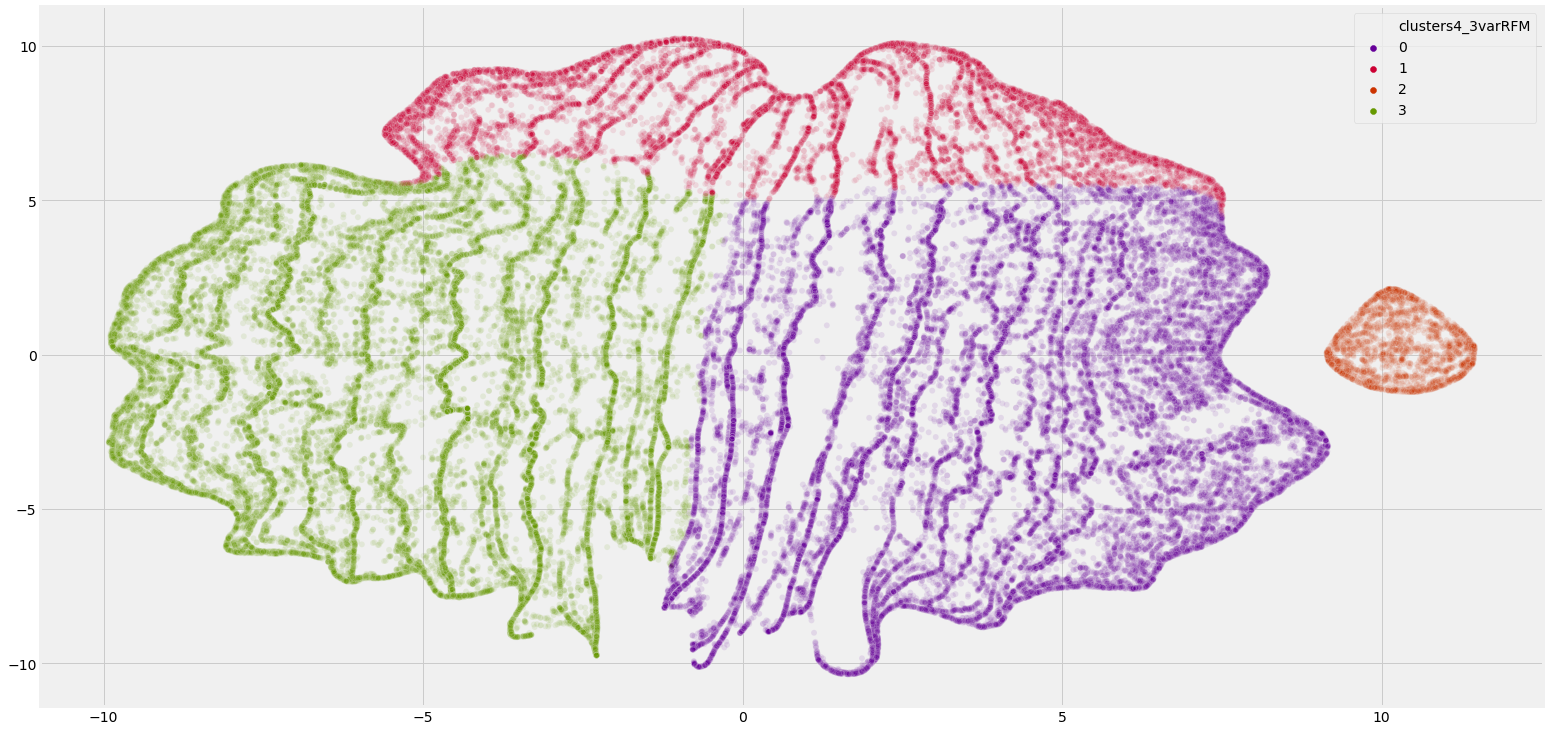

In [ ]:
#TSNE
from sklearn.manifold import TSNE #as PCA
nb=90000;#until it crashes
clusterCol='clusters4_3varRFM';champs='Recency,Frequency,Monetary'.split(',')
#clusterCol='clusters4_9variables';champs='Recency,Frequency,Monetary,avgCartPrice,avgItemPrice,avgItemFdp,nbProductsDifferents'.split(',')
#clusters4_9variables,clusters4_3varRFM

#x_scaled,exclusions.sort();print(exclusions)
dflog=df['customer'].copy()[:nb][champs+[clusterCol]]
dflogscaled,_=toLogScaled(dflog,champs)
#highly recommanded to use PCA -- évite lf forme bouteille de kleine for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high
tsne = TSNE(init='pca',random_state=1,verbose=1,n_iter=250, metric="cosine",n_jobs=-1, random_state=42)#distance is cosinus
#tsne.components_
tsne_coordinates = tsne.fit_transform(dflogscaled)
save('tsne_coordinates')

plt.figure(figsize=(20, 20))
sns.scatterplot(tsne_coordinates[:, 0], tsne_coordinates[:, 1], alpha=.1,hue=dflog[clusterCol],palette=sns.color_palette('brg',np.unique(dflog[clusterCol]).shape[0]),title='tsne '+clusterCol+' [:'+str(nb)+']');#Oui, c'est joli ce sac de noeuds, non ?
fn='tsnescatter-'+clusterCol+'-'+str(nb)+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn)

##Isomap
- http://1.x24.fr/a/jupyter/olist/scatterisomap-3varsRFM.webp #2 est fondue dedans
- http://1.x24.fr/a/jupyter/olist/scatterisomap-9vars.webp #

In [ ]:
from sklearn.manifold import Isomap

champs='Recency,Frequency,Monetary,avgCartPrice,avgItemPrice,avgItemFdp,nbProductsDifferents'.split(',')
#champs='Recency,Frequency,Monetary'.split(',')

dflog=df['customer'].copy()[:15000]
dflogScaled,_=toLogScaled(dflog[champs],champs)

iso = Isomap(n_neighbors=30, n_components=2, n_jobs=-1, random_state=42)
pos = iso.fit_transform(dflogScaled)
save('pos');save('dflog')

plt.figure(figsize=(20, 20))


#save('dflog');load('dflog');load('pos');type(pos[:, 0])type(dflog['clusters4_3varRFM'])
#scatter1(x=pos[:, 0],y=pos[:, 1],color=dflog['clusters4_3varRFM'],fn='isomap-3varsRFM',o=.3)
scatter1(x=pos[:, 0],y=pos[:, 1],color=dflog['clusters4_9variables'],fn='isomap-9vars',o=.3)

assert(False)

#ligne par ligne permet de placer un label texte
for x, y, t in zip(pos[:, 0], pos[:, 1], dflogScaled.columns.tolist()):
  assert(False)
  plt.scatter(x, y)
  plt.text(x=x, y=y, s=t)

pos
#eigenvectors
iso.kernel_pca_.components_
dir(iso)

AttributeError: ignored

In [ ]:
#.----------------------------------------------------------------

#.----------------------------------------------------------------

#Clustering Algorythms

##Dbscan

In [ ]:
from sklearn.cluster import DBSCAN #is Density Based Clustering
#
reduced=df['customer']['Recency,FrequenceTotale,Monetary'.split(',')][:100000].copy()
reduced=toLogScaled(reduced,'Recency,FrequenceTotale,Monetary'.split(','))
db = DBSCAN(eps=0.5, min_samples=6, algorithm='ball_tree', metric='euclidean').fit(reduced)#11
#reduced['Labels'] = db.labels_

pca_projected = pca.transform(reduced)

plt.figure(figsize=(24, 24))
plt.title('DBSCAN with epsilon 11, min samples 6')
sns.scatterplot(pca_projected[:,0],pca_projected[:,1], hue=db.labels_, palette=sns.color_palette('brg', np.unique(db.labels_).shape[0]))
fn='dbscan.png';plt.savefig(fn,bbox_inches='tight');webp(fn)

##Hdbscan
- http://1.x24.fr/a/jupyter/olist/hdbscan-100000-100-clusters4_3varRFM.webp?a=20200213-123824

In [ ]:
#load('df')
!pip install hdbscan
import hdbscan
_cs=100
_ms=100

nb=100000;#max 10k pour 35go ram dispo
champs='Recency,Frequency,Monetary'.split(',')
#clusterCol='clusters4_9variables';champs='Recency,Frequency,Monetary,avgCartPrice,avgItemPrice,avgItemFdp,nbProductsDifferents'.split(',')

dflog=df['customer'][champ][:nb]
dflogscaled=toLogScaled(dflog,champs)

#Si trop de labels ... Limiter
pcaModele='pcaGlobale2dim3VarRFM.model.pkl'
getFile(pcaModele)
pca = pickle.load(open(pcaModele, 'rb'))
pcs = pca.components_
pca_projected = pca.transform(dflogscaled)

db = hdbscan.HDBSCAN(min_cluster_size=_cs,min_samples=_ms)#20k/30 => 5 clusters, /5 : 1, 20
db.fit(dflogscaled)
db.probabilities_
nbLabels=len(unik(db.labels_))
#print('divider',_divider,'nblabels',nbLabels)
#dflogscaled['Clusters']=db.labels_;#ici , et non avant
plt.figure(figsize=(24,24));
pcaScatter(pca_projected,db.labels_,champs,'hdbscan.png',.3,pcs)

dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-hdbscan.webp?a=20200213-124132


{0: {'Frequency': 0.7067531953291757,
  'Monetary': 0.7017656356888355,
  'Recency': -0.08958188130556893},
 1: {'Frequency': -0.007734442897437677,
  'Monetary': -0.1189525385002089,
  'Recency': -0.9928698162284031}}

##Optics
- Très très long à calculer

In [ ]:
import sklearn.cluster

nb=20000
dflog=df['customer'][champs][:nb]
dflogscaled=toLogScaled(dflog,champs)

#Si trop de labels ... Limiter
pcaModele='pcaGlobale2dim3VarRFM.model.pkl'
getFile(pcaModele)
pca = pickle.load(open(pcaModele, 'rb'))
pcs = pca.components_
pca_projected = pca.transform(dflogscaled)

#euclidian,eps=0.5,,max_eps=1
#min_cluster_size
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

db = sklearn.cluster.OPTICS(min_samples=100,metric='minkowski',n_jobs=-1).fit(dflogscaled)#11,eps=0.5, min_samples=6, algorithm='ball_tree', metric='haversine',minkowski (0.5° c'est beaucoup, non ?)
plt.figure(figsize=(24,24));
benLib1.removepng=0
pcaScatter(pca_projected,db.labels_,champs,'optics.png',.3,pcs)
ftpput('nbdim:2,dim0-1-optics.png')

dimensions (0, 1)
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-optics.webp?a=20200216-160849
put : http://1.x24.fr/a/jupyter/olist/nbdim:2,dim0-1-optics.png?a=20200216-160852


##Dendogram
- obtenir le bon nombre de clusters

In [ ]:
#load()
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

benLib1.removepng=0
nb=2000
_x=df['customer'][champs][:nb]
#Matrice de distance entre chacun des points
dist = distance_matrix(_x,_x)#scipy.spatial.distance_matrix, scipy.cluster.hierarchy.linkage
#print(dist)

y = hierarchy.linkage(_x, 'complete')
plt.figure(figsize=(18,800))
dendro = hierarchy.dendrogram(y, leaf_rotation=0, leaf_font_size=12, orientation='right')
fn='dendro-y'+str(nb)+'.png';plt.savefig(fn,bbox_inches='tight');webp(fn);plt.close()
ftpput('dendro-y'+str(nb)+'.png')
#python lat lon dendrogram
#Circular dendogram
if True:
  plt.figure(figsize=(18,800))
  Z = hierarchy.linkage(dist, 'complete')
  dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
  fn='dendro-complete'+str(nb)+'.png'
  plt.savefig(fn,bbox_inches='tight');webp(fn)
  plt.close()

  plt.figure(figsize=(18,800))
  Z = hierarchy.linkage(dist, 'average')
  fn='dendro-avg'+str(nb)+'.png'
  dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
  plt.savefig(fn,bbox_inches='tight');webp(fn)
  plt.close()


ftpput('dendro-complete'+str(nb)+'.png')
ftpput('dendro-avg'+str(nb)+'.png')

put : http://1.x24.fr/a/jupyter/olist/dendro-y2000.webp?a=20200217-090853
put : http://1.x24.fr/a/jupyter/olist/dendro-y2000.png?a=20200217-090856
put : http://1.x24.fr/a/jupyter/olist/dendro-complete2000.webp?a=20200217-090939
put : http://1.x24.fr/a/jupyter/olist/dendro-avg2000.webp?a=20200217-091020
put : http://1.x24.fr/a/jupyter/olist/dendro-complete2000.png?a=20200217-091023
put : http://1.x24.fr/a/jupyter/olist/dendro-avg2000.png?a=20200217-091026


In [ ]:
#distingue les gros des petits
#df['customer'].loc[1021];df['customer'].loc[288]# => gros paniers

customer_unique_id        02ccceb879088a0253e1e46e0200bdb8
customer_city                                      birigui
customer_state                                          sp
zip                                                  16200
Recency                                                 20
Frequency                                                1
avgCartPrice                                       2338.08
Monetary                                           2338.08
avgItemPrice                                       2338.08
avgItemFdp                                          174.45
nbProductsDifferents                                     1
sumOrderedItems                                          1
FrequenceTotale                                          1
joursEntreCommandes                                      0
R                                                        4
F                                                        1
M                                                       

In [ ]:
ftpput('dendro-y2000.png')
ftpput('dendro-complete2000.png')
ftpput('dendro-avg2000.png')

put : http://1.x24.fr/a/jupyter/olist/dendro-y2000.png?a=20200217-092141
put : http://1.x24.fr/a/jupyter/olist/dendro-complete2000.png?a=20200217-092144
put : http://1.x24.fr/a/jupyter/olist/dendro-avg2000.png?a=20200217-092148


#Inertia/3days

In [ ]:
from collections import Counter

getFile(modeleKmeans)
kmeans4clustersRFM = pickle.load(open(modeleKmeans, 'rb'))

ks='3,14,30,91'.split(',')
for k in ks:
  pop={}
  scores={}
  labels={}
  dflog=df[k][champs+['nbDays']].copy()
  dflogscaled=toLogScaled(dflog,champs)
  dflogscaled['nbDays']=dflog['nbDays']
  grouppedBy=dflogscaled.groupby('nbDays')#.sort_values(by='nbDays')#[champs]
  #reverse=reversed(tuple(grouppedBy))
  #list(tuple(grouppedBy))

  for ix, rows in list(tuple(grouppedBy)):  
    nbdix=rows['nbDays'].values[0]
    nbrows=rows.shape[0]
    rows.drop(['nbDays'],axis=1,inplace=True)
    rows.replace([np.inf, -np.inf], np.nan)#shoul

    labels[nbdix]=kmeans4clustersRFM.predict(rows)
    scores[nbdix]=round(kmeans4clustersRFM.score(rows)/nbrows,3)
    #print(nbdix,'nbrows:',nbrows,'scores:',scores[nbdix],'/', arsort(Counter(labels[nbdix])))
    #print(kmeans4clustersRFM.inertia_)#toujours la même
  plot(scores,fn=k+'scores.png',width=24,height=6)#on the same ?

put : http://1.x24.fr/a/jupyter/olist/plot3scores.webp?a=20200217-102733
put : http://1.x24.fr/a/jupyter/olist/plot14scores.webp?a=20200217-102736
put : http://1.x24.fr/a/jupyter/olist/plot30scores.webp?a=20200217-102739
put : http://1.x24.fr/a/jupyter/olist/plot91scores.webp?a=20200217-102742


#.------------------------------------

# .>>>> En un temps <<<<
- Juste à accorder les variables de début de fichier, puis lancer

In [ ]:
###Variables to change according to the needs
#recalculer le modèle sur les n derniers jours
#python POLIST_03_ScriptReclusteringAutomatique.py 800 generate
#obtenir résultats clustering sur n jours
#python POLIST_03_ScriptReclusteringAutomatique.py 14
import os
import sys

limiteTemporelleEnNombreDeJours=sys.argv[1]
        
if((limiteTemporelleEnNombreDeJours.isdigit()) & (int(limiteTemporelleEnNombreDeJours)>0)):
    pass
else:
    limiteTemporelleEnNombreDeJours=90
    
limiteTemporelleEnNombreDeJours=int(limiteTemporelleEnNombreDeJours)    
    
#print(limiteTemporelleEnNombreDeJours)
    
#kmeans4clusters9vars.model.pkl
modeleKmeans='gkmeans4clustersRFM.model.pkl';
#pour la projection
pcaModele='gpcaGlobale2dim3VarRFM.model.pkl'
champs = 'Recency,FrequenceTotale,Monetary'.split(',')
#zip contenants les tables au format csv
fn='brazilian-ecommerce.zip';
knbc=4

####### go to logic
#os.chdir('workingdirectory')
os.system('rm -f benLib1.py')
os.system('wget https://alpow.fr/benLib1.py')
if('pysftp' not in sys.modules):    
    os.system('pip install pysftp')
if('webptools' not in sys.modules):        
    os.system('pip install webptools')
    
import benLib1
from benLib1 import *

from datetime import datetime, timedelta
import numpy as np
import warnings
import itertools
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import glob
from sklearn import decomposition
from sklearn import preprocessing
import sklearn.cluster

benLib1.sftp = {
    'cd': 'olist',
    'web': 'http://1.x24.fr/a/jupyter/olist/',
    'h': 'hz',
    'u': 'zr',
    'p': 'z'}
exclusions = ''.split(',')

def load(fn='allVars'):
    globals().update(benLib1.resume(fn))
    
def loadData(f, sep=','):
    return pd.read_csv(f, sep=',')

def save(
        exc=[],
        fn='allVars',
        include=False,
        backup=False,
        ftp=True,
        cleanup=True,
        zip=True,
        authTypes=[str,dict,list,int,pd.DataFrame,pd.Series,np.ndarray]):
    if(isinstance(exc, str)):  # quicksave single var
        fn = exc
        include = [exc]
        exc = []
        authTypes = False
    elif exc == []:
        exc = exclusions
    benLib1.save(
        globals(),
        exclusions=exc,
        fn=fn,
        include=include,
        backup=backup,
        ftp=ftp,
        cleanup=cleanup,
        zip=zip,
        authTypes=authTypes)

#functions
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (24, 12)
plt.rcParams['figure.facecolor'] = 'white'
np.random.seed(seed=1983)
rgb = ["red", "green", "blue"]

def toLogScaled(odf, cols):
    labenc={}
    df=odf.copy()
    for i in cols:
        if(df.dtypes[i]==object):
            df[i],labenc[i]=labelsToNumeric(df[i])

        df[i] = df[i].apply(np.log).round(3)    

    # passage au log .. pas d'erreur de conversion float -inf .???
    df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    _scaler = StandardScaler()
    # Input contains infinity or a value too large for dtype('float64').
    df_scaled = _scaler.fit_transform(df[cols])
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=cols)
    return df_scaled,labenc

warnings.filterwarnings('ignore')

def pcaScatter(
        X_projected,
        clusters,
        cols,
        fn,
        alpha=1,
        pcs=False,
        centers=False,
        scaleEigenVectors=False,
        title=False,
        displayTriples=False,
        displayPairs=True,
        xmin=0,
        xmax=0,
        ymin=0,
        ymax=0):
  # print(type(centers),type(centers)==np.ndarray)
  xminFixed=0
  if(xmin!=0):
    xminFixed=1
  nbDimensions=X_projected.shape[1]
  #nbColonnes,vecteurs
  pairs=list(itertools.combinations(range(0,nbDimensions),2))
  #et les triples ?
  
  dims = {}
  k = 0

  if((nbDimensions>2) & displayTriples):
    triples=list(itertools.combinations(range(0,nbDimensions),3))
    for triple in triples:
      print(triple)
      xs=pca_projected[:,triple[0]];ys=pca_projected[:,triple[1]];zs=pca_projected[:,triple[2]]
      px.scatter_3d(pd.DataFrame.from_dict({'Dim'+str(triple[0]):xs,'Dim'+str(triple[1]):ys,'Dim'+str(triple[2]):zs,'color':clusters}),
                    x='Dim'+str(triple[0]),y='Dim'+str(triple[1]),z='Dim'+str(triple[2]),
                    color='color',color_continuous_scale=rgb,opacity=.3).show()

  if(displayPairs):
    for pair in pairs:
      print('dimensions',pair)
      xs = X_projected[:, pair[0]]
      ys = X_projected[:, pair[1]]
      if(xminFixed==0):
        xmax = xs.max()
        xmin = xs.min()
        ymax = ys.max()
        ymin = ys.min()

      xscale = (xmax - xmin) / 2
      yscale = (ymax - ymin) / 2
      mlim = min([abs(ymin), abs(ymax), abs(xmin), abs(xmax)])

      sns.scatterplot(xs, ys, alpha=alpha, hue=clusters, palette=sns.color_palette(
        'brg', np.unique(clusters).shape[0]))  
      
      if type(pcs) == np.ndarray:    
        nbColumns = pcs.shape[1]                      
        for i in list(range(nbColumns)):
            x1 = pcs[pair[0], i] * mlim  # xscale*0.5; exagérées
            y1 = pcs[pair[1], i] * mlim  # yscale*0.5;#deux dimensions

            if scaleEigenVectors:
                x1 = pcs[pair[0], i] * xscale * 0.5  # ; exagérées
                y1 = pcs[pair[1], i] * xscale * 0.5

            plt.arrow(
                0,
                0,
                x1 * 0.8,
                y1 * 0.8,
                width=0.04,
                color='k',
                alpha=0.8)
            plt.text(
                x1 * 0.9,
                y1 * 0.9,
                cols[i],
                color='k',
                ha='center',
                va='center',
                fontsize=32)
            if(xminFixed==0):
              if(x1 > xmax):
                  xmax = x1
              elif(x1 < xmin):
                  xmin = x1
              if(y1 > ymax):
                  ymax = y1
              elif(y1 < ymin):
                  ymin = y1
                  
      plt.xlabel('dim:'+str(pair[0]))
      plt.ylabel('dim:'+str(pair[1]))
      plt.xlim(xmin, xmax)
      plt.ylim(ymin, ymax)

      if(type(centers) == np.ndarray):
        plt.scatter(centers[:, pair[0]], centers[:, pair[1]],marker='x', color='k', linewidths=2, s=160)

      if title:
        plt.title('dim'+str(pair[0])+'-'+str(pair[1])+'-'+title)

      fn2='nbdim-'+str(nbDimensions)+'-dim'+str(pair[0])+'-'+str(pair[1])+'-'+fn
      plt.savefig(fn2, bbox_inches='tight')
      webp(fn2)
      plt.close()

  if type(pcs) == np.ndarray:
      for i in pcs:
          l = 0
          dims[k] = {}
          for j in i:
              dims[k][cols[l]] = j
              l += 1
          k += 1

  return dims

  
####### logic
#chargement du modèle "fitté"
getFile(fn)
os.system('rm -f olist_*.csv')
os.system('rm -f product_*.csv')
os.system('unzip '+fn)

odf={}
for file in glob.glob("*.csv"):
  f2=file.replace('olist_','').replace('.csv','').replace('_dataset','')
  odf[f2]=loadData(file)
   
odf['orders']["t_month"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"]).dt.strftime('%m')
odf['orders']["t_year"] = pd.to_datetime(odf['orders']["order_purchase_timestamp"]).dt.year
odf['orders']["t_ym"] = (odf['orders']["t_year"].map(str)+''+odf['orders']["t_month"].map(str)).astype('int')

FrequencyPerCustomer=pd.merge(odf['orders'],odf['customers'],on=["customer_id"],how="inner")
FrequencyPerCustomer=FrequencyPerCustomer.groupby('customer_unique_id').agg({'order_id':'nunique'}).sort_values(by='order_id',ascending=False)
FrequencyPerCustomer.rename({'order_id':'FrequenceTotale'},inplace=True,axis=1)

cond1=odf['orders']['t_ym']>201612
cond2=odf['orders']['t_ym']<201809
cond3=odf['orders']['t_ym']>201810
odf['orders']=odf['orders'][(cond1 & (cond2 | cond3))]

maxx=pd.to_datetime(odf['orders']["order_purchase_timestamp"]).max()


#limiteTemporelleEnNombreDeJours=300
limiteImportation=maxx - timedelta(days=limiteTemporelleEnNombreDeJours)

cond=pd.to_datetime(odf['orders']["order_purchase_timestamp"]) >=limiteImportation
ordersLimitees=odf['orders'][cond]

sumPerOrder=odf['order_payments'].groupby('order_id').agg({"payment_value":["sum","mean",'count']})
sumPerOrder.columns = [' '.join(col).strip() for col in sumPerOrder.columns.values]
sumPerOrder.rename({'payment_value sum':'sumPayment','payment_value mean':'avgPayment','payment_value count':'nbPayments'}, axis=1, inplace=True) 

ordersLimitees = pd.merge(ordersLimitees,sumPerOrder,on=["order_id"],how="inner")
ordersLimitees = pd.merge(ordersLimitees, odf['customers'], on=["customer_id"], how="inner")
ordersLimitees = pd.merge(ordersLimitees, FrequencyPerCustomer, on=["customer_unique_id"], how="inner")

orderItems=odf['order_items'].groupby('order_id').agg({"price":['sum','mean','count'],'freight_value':['sum','mean'],'product_id':'nunique'})
orderItems.columns = [' '.join(col).strip() for col in orderItems.columns.values]
orderItems.rename({'price sum':'sumPrice','price mean':'avgPrice','price count':'nbItems','freight_value sum':'sumFdp','freight_value mean':'avgFdp','product_id nunique':'nbProductsDifferents'}, axis=1, inplace=True) 
ordersLimitees=ordersLimitees.merge(orderItems,on='order_id',how='inner')

orderReviews=odf['order_reviews'].groupby('order_id').agg({"review_score":['sum','mean','count']})
orderReviews.columns = [' '.join(col).strip() for col in orderReviews.columns.values]
orderReviews.rename({'review_score sum':'sumReviews','review_score mean':'avgReview','review_score count':'nbReview'}, axis=1, inplace=True) 
ordersLimitees=ordersLimitees.merge(orderReviews,on='order_id',how='left')#optionnelles

ordersLimitees=ordersLimitees.drop(['FrequenceTotale'],axis=1)
ordersLimitees=ordersLimitees.merge(FrequencyPerCustomer,on='customer_unique_id',how='inner')

grouped=ordersLimitees.groupby(['customer_unique_id']).agg({'customer_city':lambda x:distinct(x),'customer_state':lambda x:distinct(x),'customer_zip_code_prefix':lambda x: x.values[0],
                                     'customer_id':'count',
                                     'order_id':'nunique',
                                     'sumPrice':['mean','sum'],
                                     'avgPrice':'mean',
                                     'avgFdp':'mean',
                                     'order_purchase_timestamp':['min','max'],
                                     'nbProductsDifferents':'sum','nbProductsDifferents':'sum',
                                     'nbItems':'sum',
                                     'FrequenceTotale':'max',#                                     
                                     })
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]#,'nbPayments':'mean','avgReview':'mean','nbReview':'sum',

grouped['joursEntreCommandes']=(pd.to_datetime(grouped['order_purchase_timestamp max'])-pd.to_datetime(grouped['order_purchase_timestamp min'])).dt.days.astype('int')#individuellement
grouped.rename({'customer_id count':'Recency','order_id nunique':'Frequency','sumPrice sum':'Monetary','avgFdp mean':'avgItemFdp','avgPrice mean':'avgItemPrice',
          'nbItems sum':'sumOrderedItems','FrequenceTotale max':'FrequenceTotale',
          'sumPrice mean':'avgCartPrice','nbProductsDifferents sum':'nbProductsDifferents','customer_city <lambda>':'customer_city',
          'customer_state <lambda>':'customer_state','customer_zip_code_prefix <lambda>':'zip'}, axis=1, inplace=True)
grouped=grouped.reset_index();
MaxDay = pd.to_datetime(grouped['order_purchase_timestamp max']).max()
grouped['Recency']=(MaxDay-pd.to_datetime(grouped['order_purchase_timestamp max'])).dt.days.astype('int')  
grouped=grouped.drop(['order_purchase_timestamp min','order_purchase_timestamp max'],axis=1)

dflog = grouped.copy()[champs]
dflogscaled,_ = toLogScaled(dflog, champs)
nbSamples = dflogscaled.shape[0]


#generate model using : python POLIST_03_ScriptReclusteringAutomatique.py 700 generate
generate=0
if(len(sys.argv)>2):
    if(sys.argv[2]=='generate'):
        generate=1
        print('generate')

if generate:
    pca = decomposition.PCA(n_components=2, random_state=42)
    pca.fit(dflogscaled)
    pcs = pca.components_
    pca_projected = pca.transform(dflogscaled)
    pickle.dump(pca, open(pcaModele, 'wb'))
    ftpput(pcaModele)

    kmeans4clustersRFM=KMeans(n_clusters= 4, max_iter= 600, init= 'k-means++',random_state=42,n_jobs=-1)
    kmeans4clustersRFM.fit(dflogscaled)  
    pickle.dump(kmeans4clustersRFM, open(modeleKmeans,'wb'))
    ftpput(modeleKmeans)
    
else:
    getFile(modeleKmeans)
    kmeans4clustersRFM = pickle.load(open(modeleKmeans, 'rb'))

predictedClusters=kmeans4clustersRFM.predict(dflogscaled)
grouped['cluster']=predictedClusters
customer2cluster=grouped['customer_unique_id,cluster'.split(',')]

getFile(pcaModele)
pca = pickle.load(open(pcaModele, 'rb'))

pcs = pca.components_
pca_projected = pca.transform(dflogscaled)

_centers=pca.transform(np.array(kmeans4clustersRFM.cluster_centers_))

fn='pcaClusteredCustomers.png'

plt.rcParams["figure.figsize"] = (24, 24)
pcaScatter(
    pca_projected,
    predictedClusters,
    champs,
    pcs=pcs,
    fn=fn,
    alpha=.5,
    centers=_centers,
    title=' '.join(champs)
    )

#afin de récuperer l'association customer_unique_id <> cluster afin d'effectuer un mailing
save('customer2cluster')
#print('Nb de clients clusterés : ',customer2cluster.shape[0])
print(customer2cluster)

# .------------------------------